# Shootout Graphs

In [26]:
import os
import sys

import shootouts

In [12]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 2000;

<IPython.core.display.Javascript object>

In [13]:
# Reload modules every time, so that we don't have to restart kernel to reload them
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Inputs

In [14]:
# Load configs and preprocess
configfile='test.yaml'
configs = shootouts.getconfigs(configfile)

# Data

In [15]:
# Test preprocess
df = shootouts.preprocess(configs, best='time')
print(df.loc[df.lang.isin(['chapel'])].head())

           shootout    lang  id  codesize_B_  mem_KB_  time_s_  codesize  \
5       binarytrees  chapel   1          554   264492   19.832  1.378109   
89   chameneosredux  chapel   1         1199    44480    4.785  1.633515   
142   fannkuchredux  chapel   1          728    34116   20.761  1.895833   
256           fasta  chapel   1         1216    28868   20.589  1.661202   
317     knucleotide  chapel   1         1056   283024   36.841  2.941504   

          time  time_codesize  
5     6.044499       3.696084  
89    8.179487       3.906737  
142   2.289985       1.831988  
256  15.183628       9.465520  
317   5.702941       4.345952  


# Plotting Functions

['chapel' 'go']


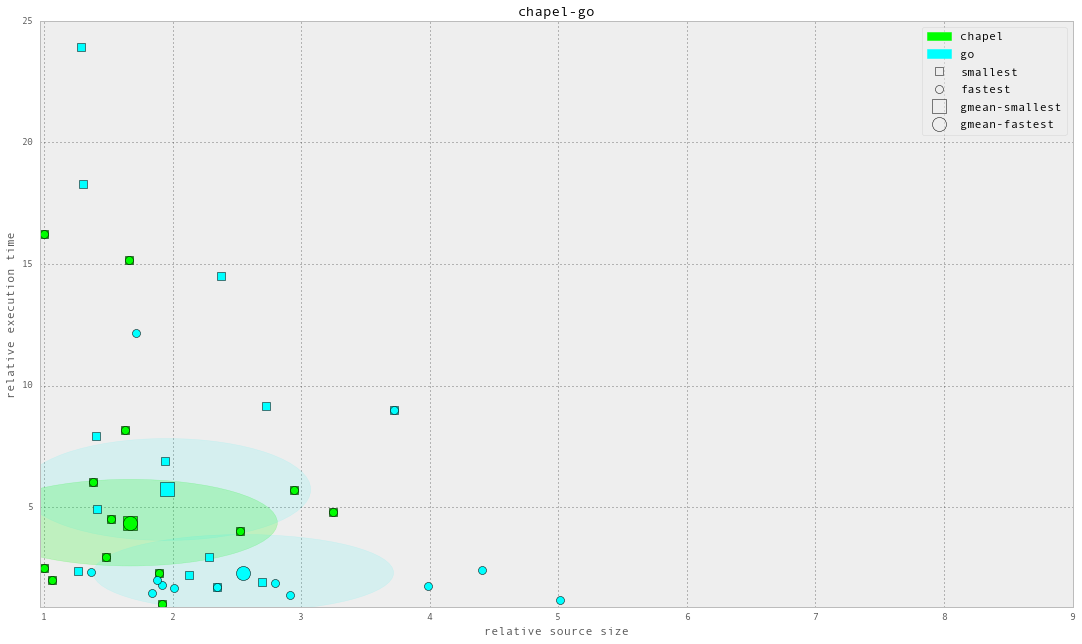

In [27]:
# Test plotlanguages
df_fast = shootouts.preprocess(configs, best='time')
df_small = shootouts.preprocess(configs, best='codesize')
    
df_fast_filtered = df_fast.loc[df_fast.lang.isin(['chapel', 'go'])]
df_small_filtered = df_small.loc[df_small.lang.isin(['chapel', 'go'])]
    
xmax=9
ymax=25


shootouts.plotlanguages([ df_small_filtered, df_fast_filtered],
                          display=['gmeans', 'gstddev', 'values'],
                          name='chapel'+'-'+'go', xmax=xmax, ymax=ymax,
                          dfmarkers=['s', 'o'], dflabels=['smallest', 'fastest'])


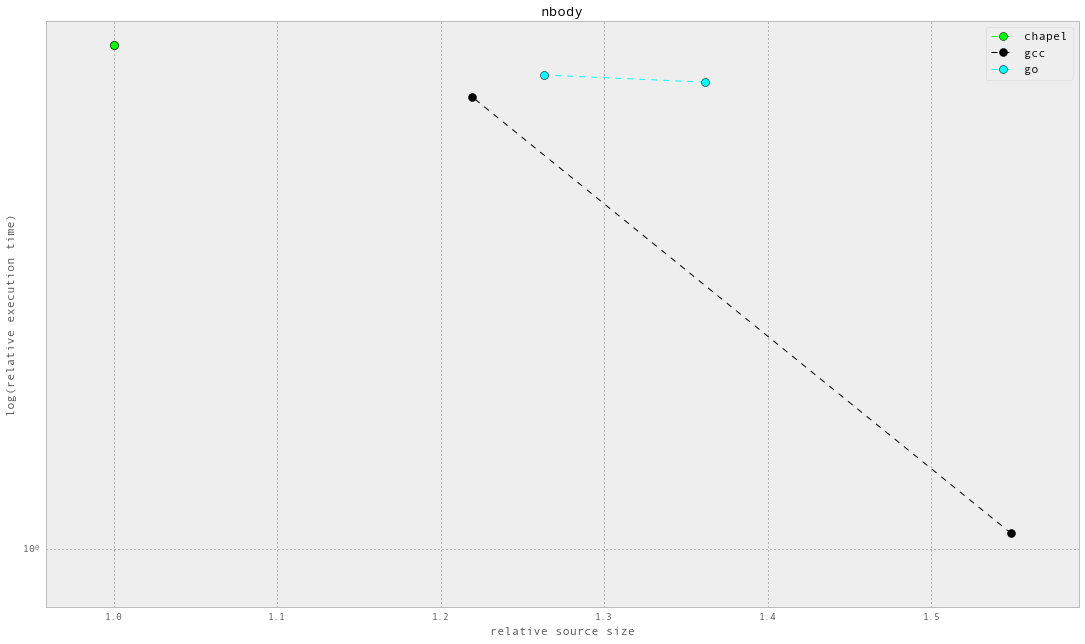

In [18]:
# Test plotshootout
df_fast = shootouts.preprocess(configs, best='time')
df_fast = df_fast.loc[df_fast.shootout.isin(['nbody'])]
df_small = shootouts.preprocess(configs, best='codesize')
df_small = df_small.loc[df_small.shootout.isin(['nbody'])]
    
shootouts.plotshootout([df_fast, df_small], display=['lines'])

# Plot Suites

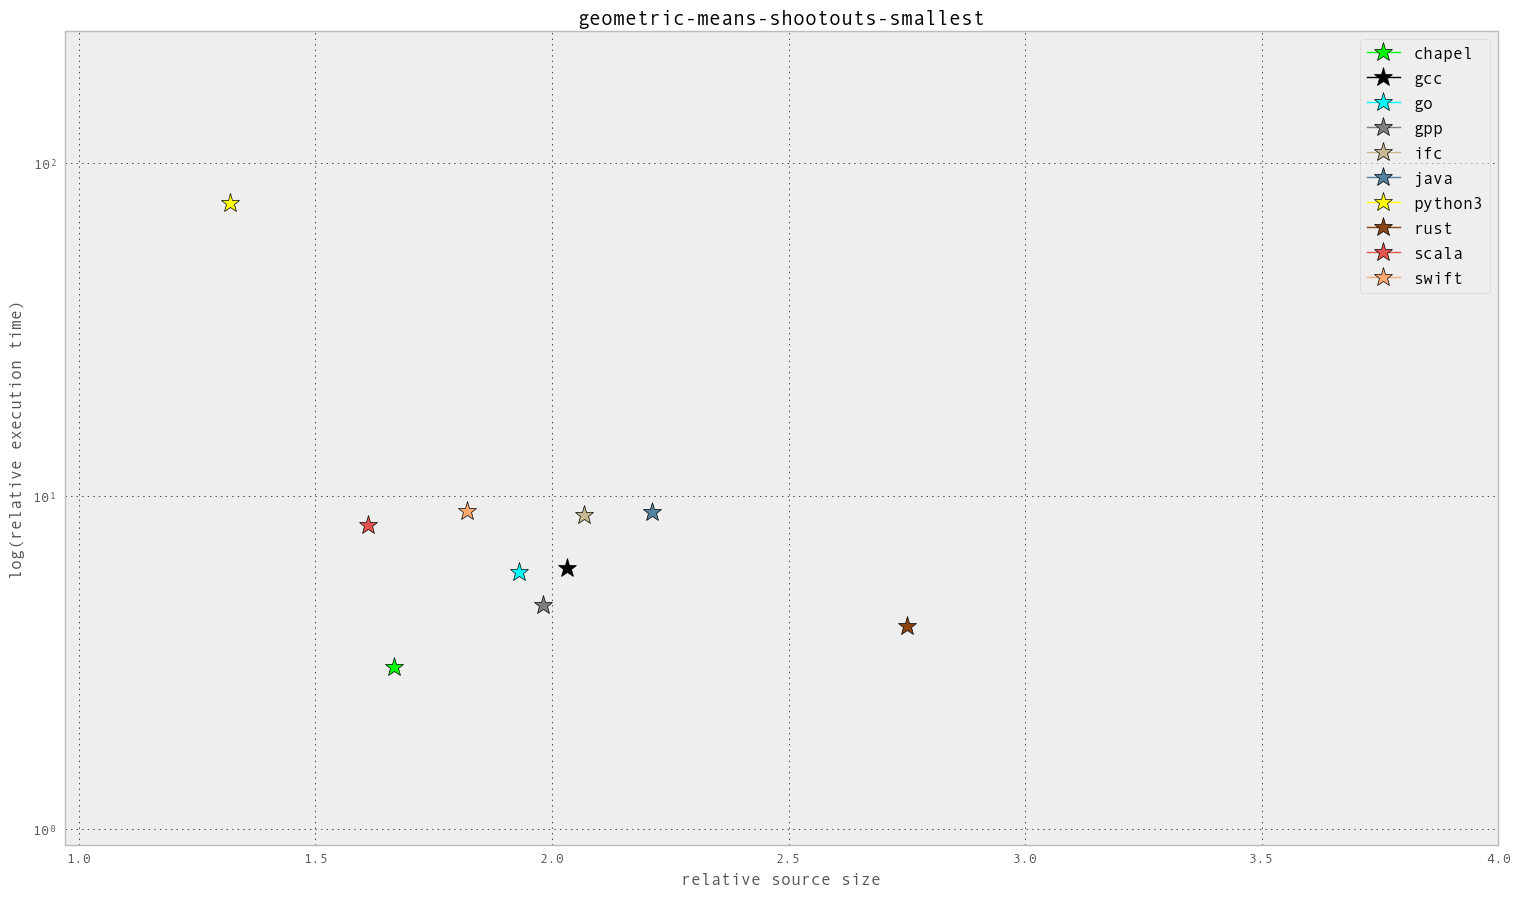

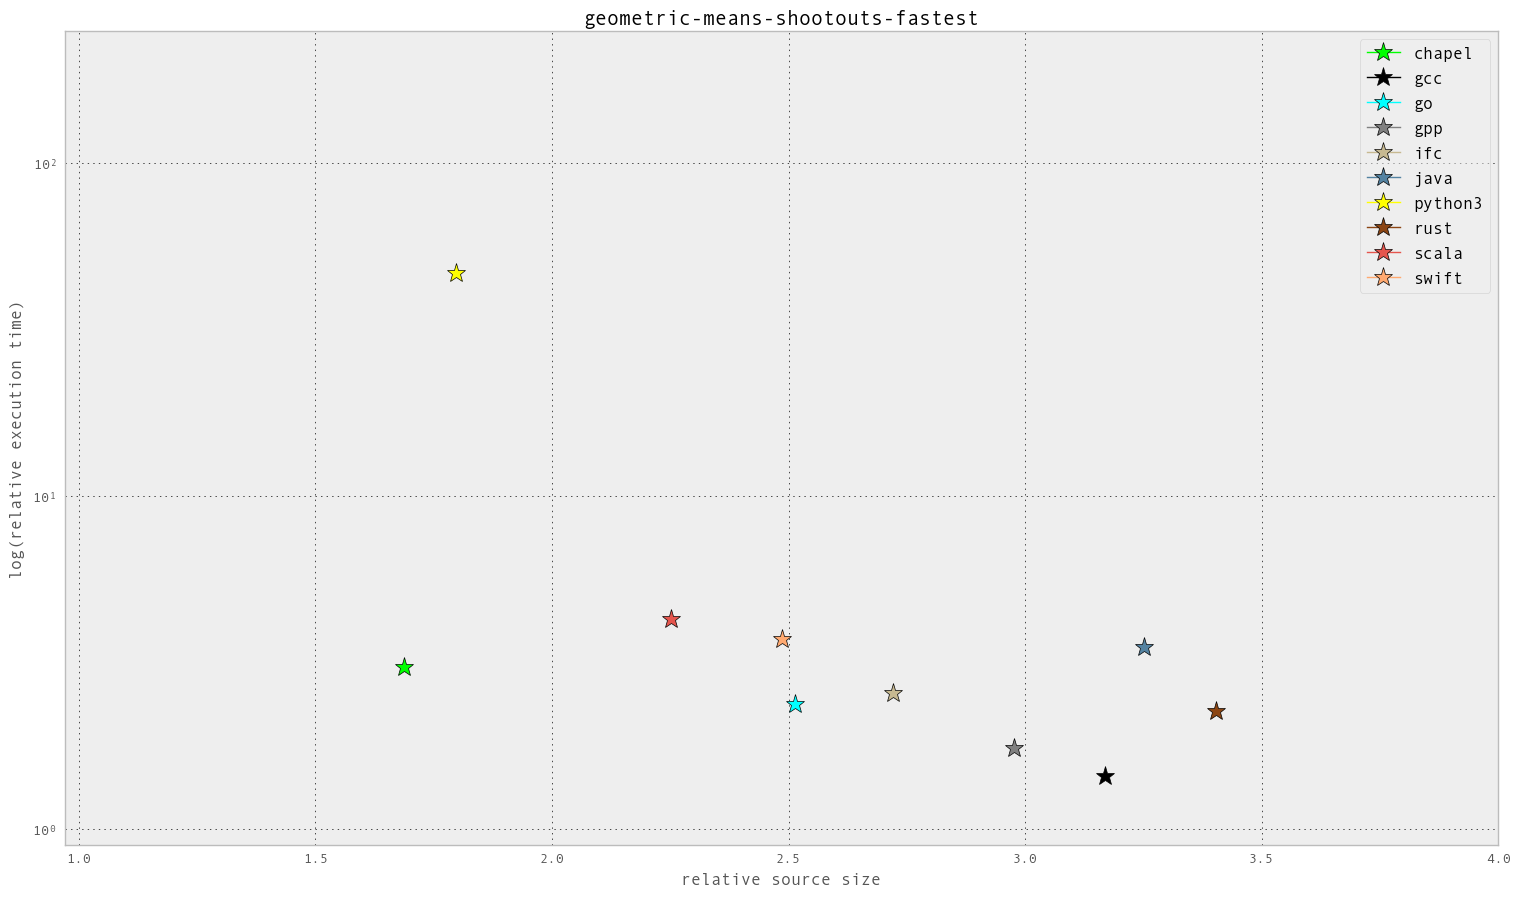

In [8]:
# Summary of languages
shootouts.language_overview(configs)

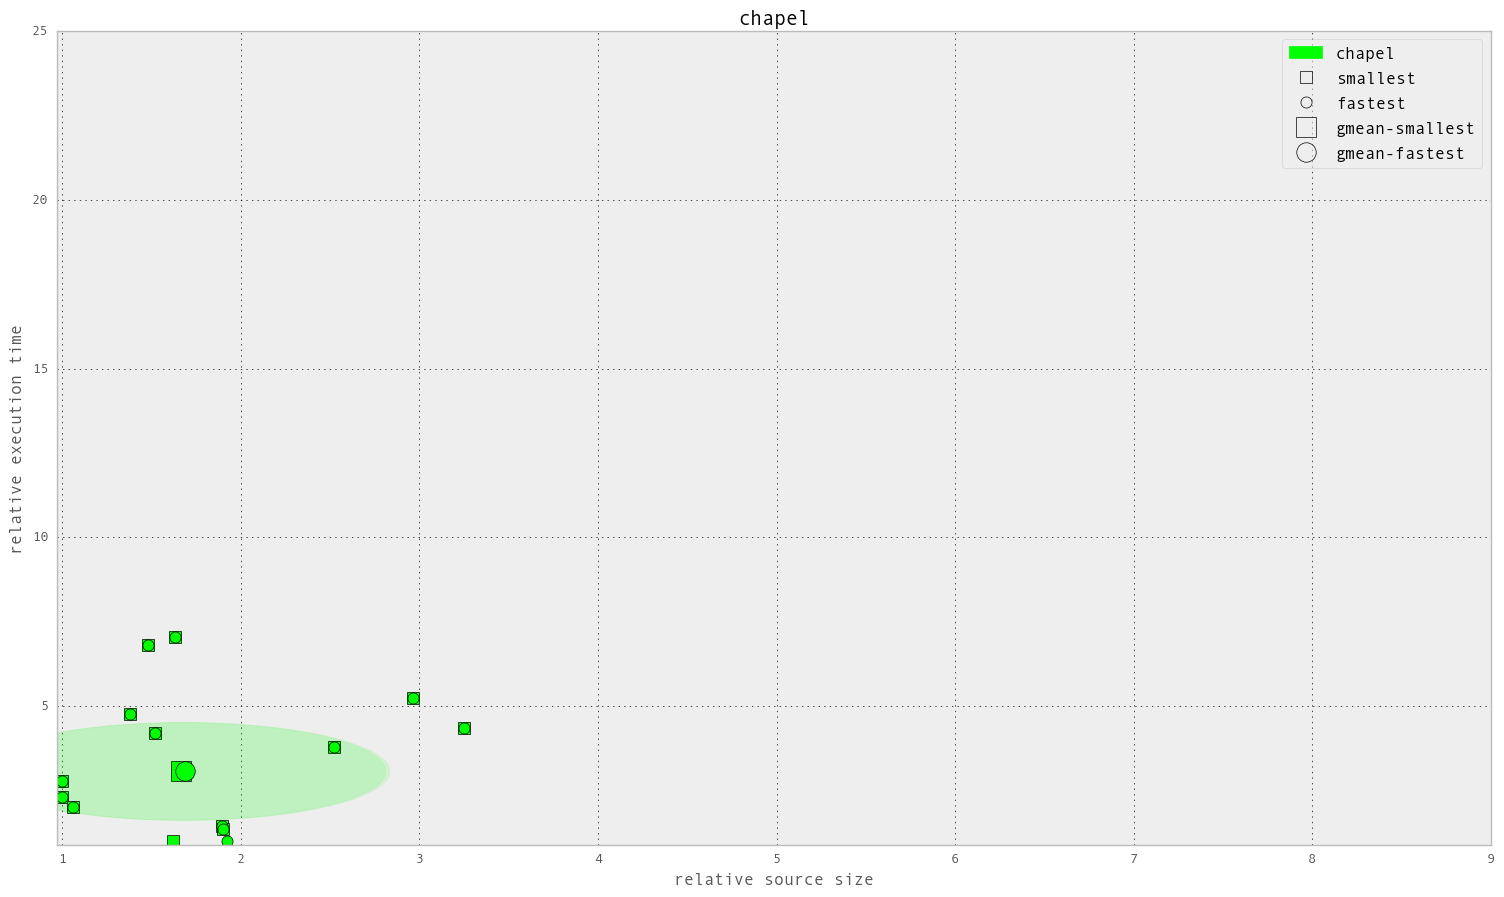

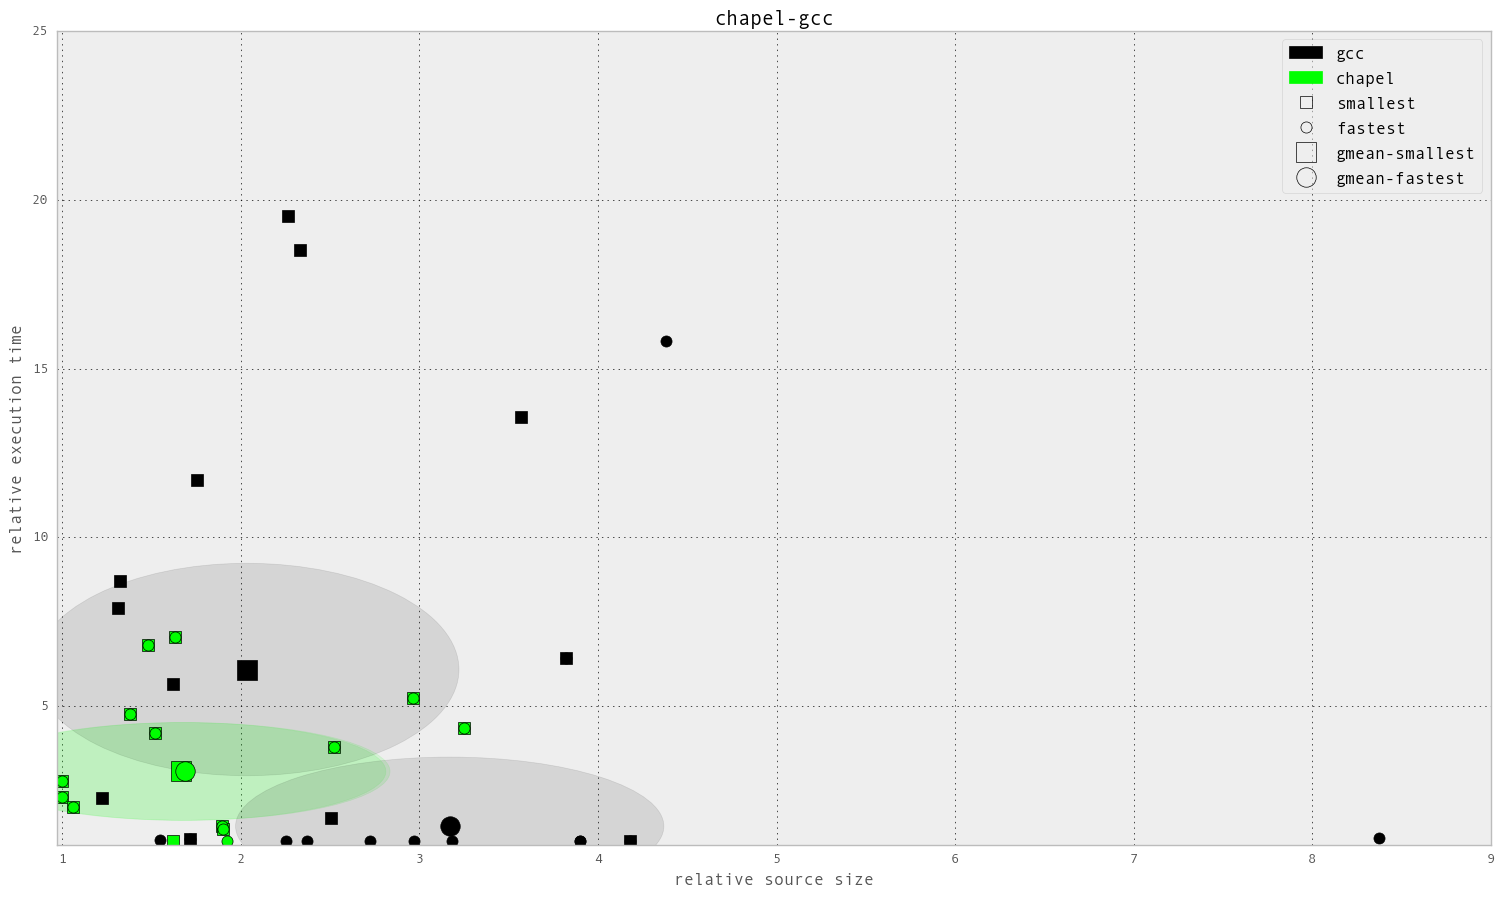

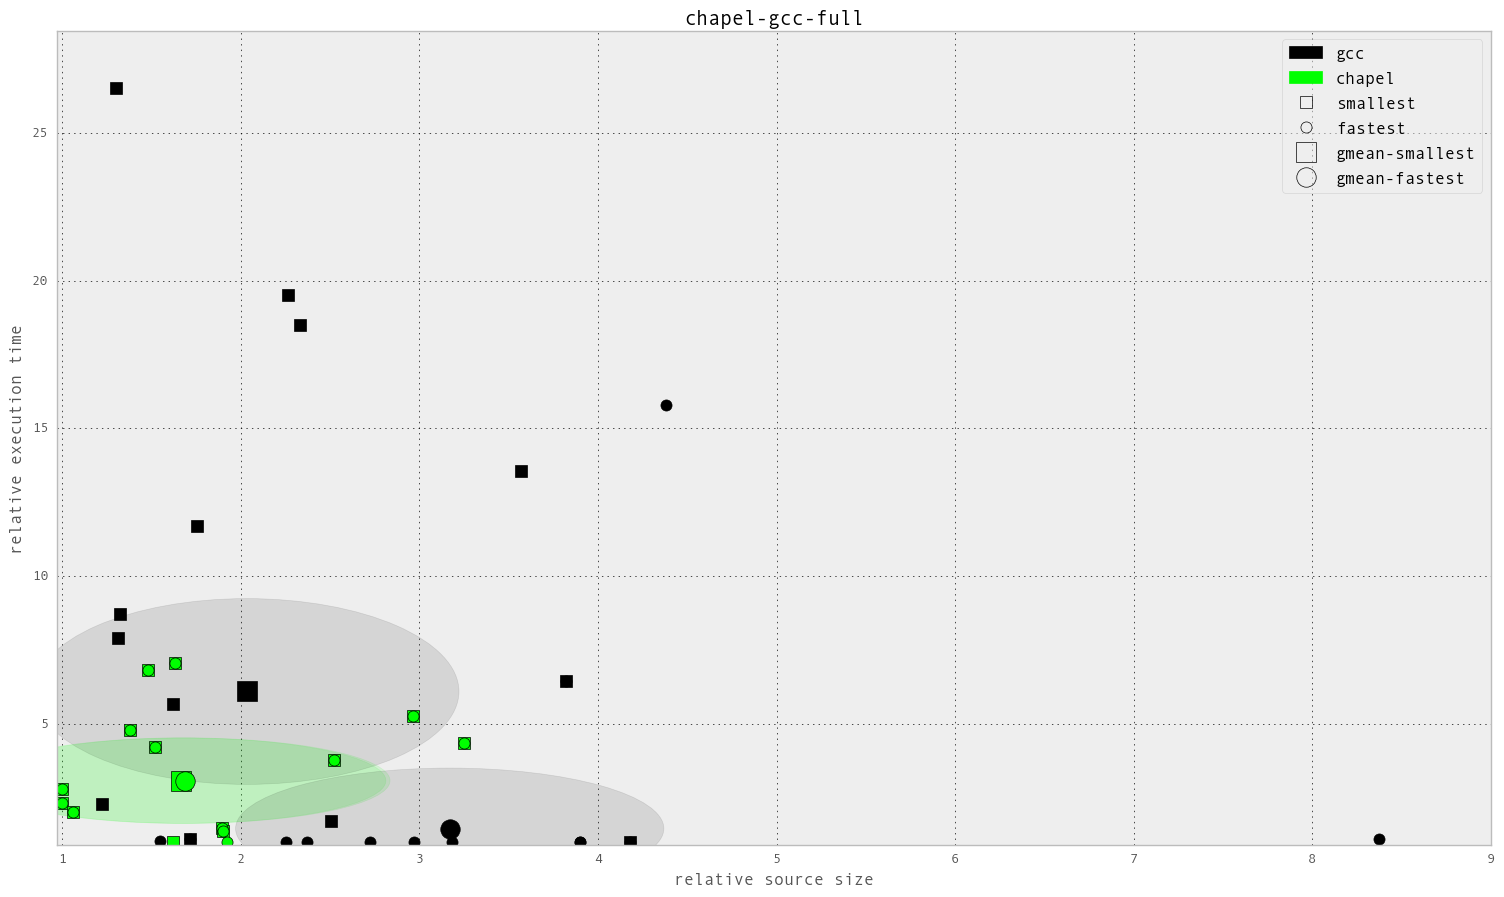

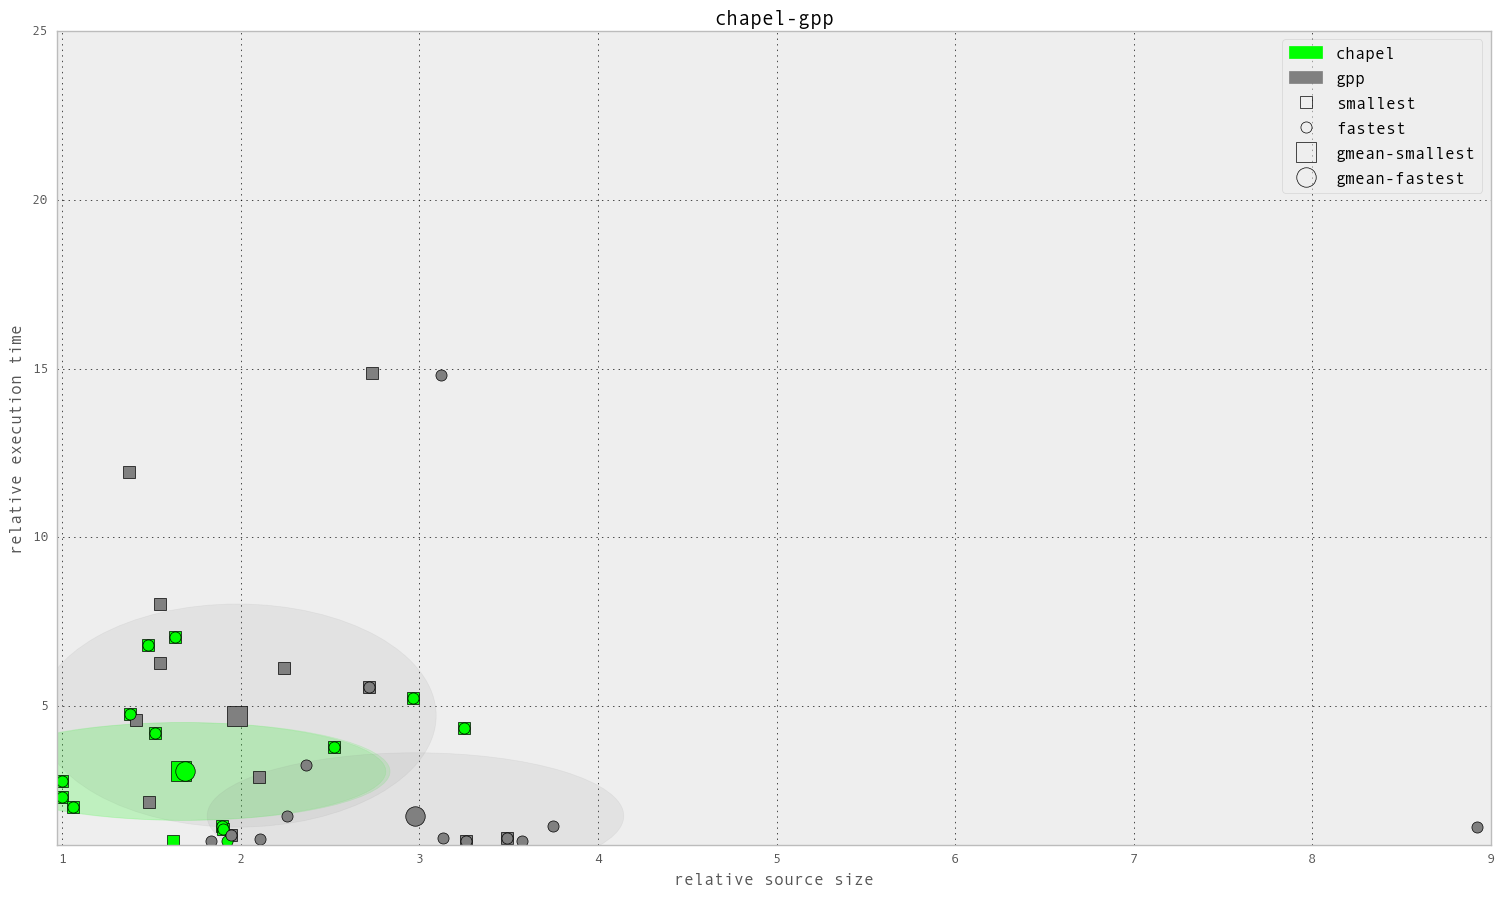

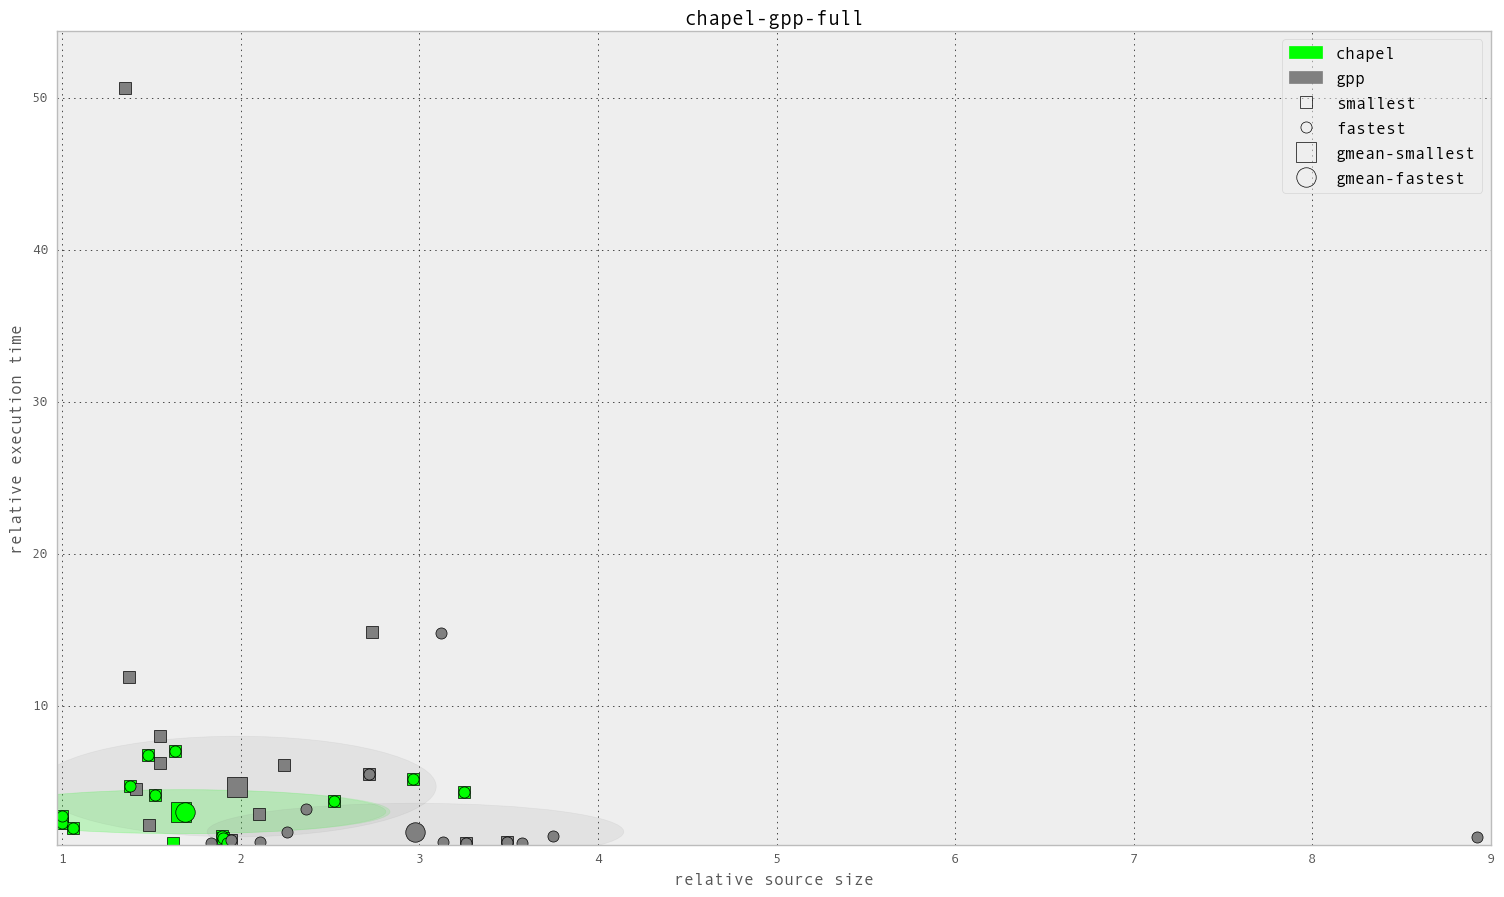

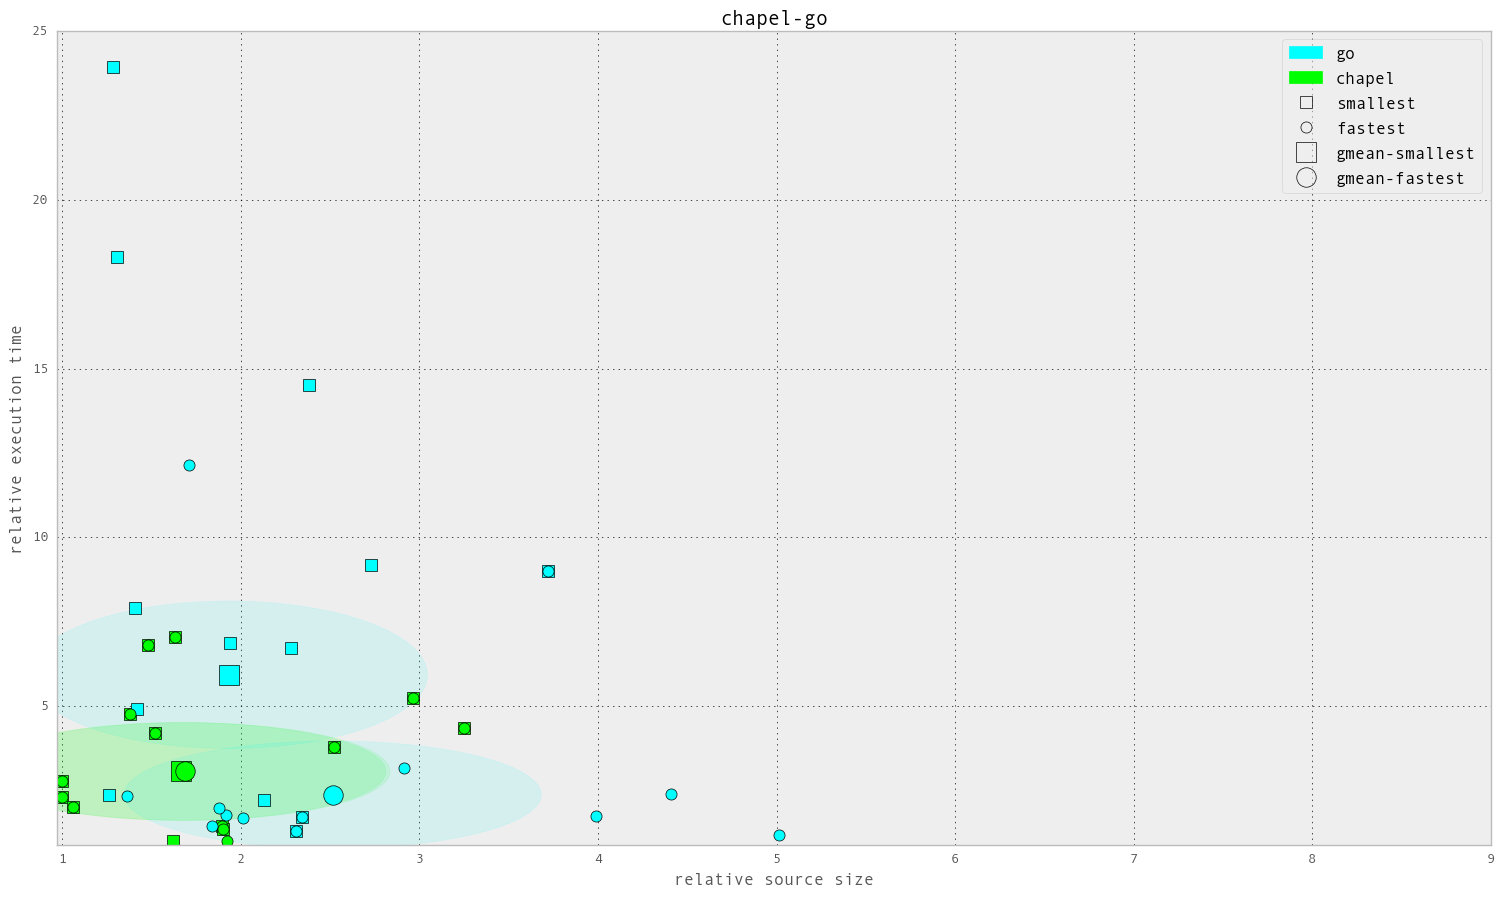

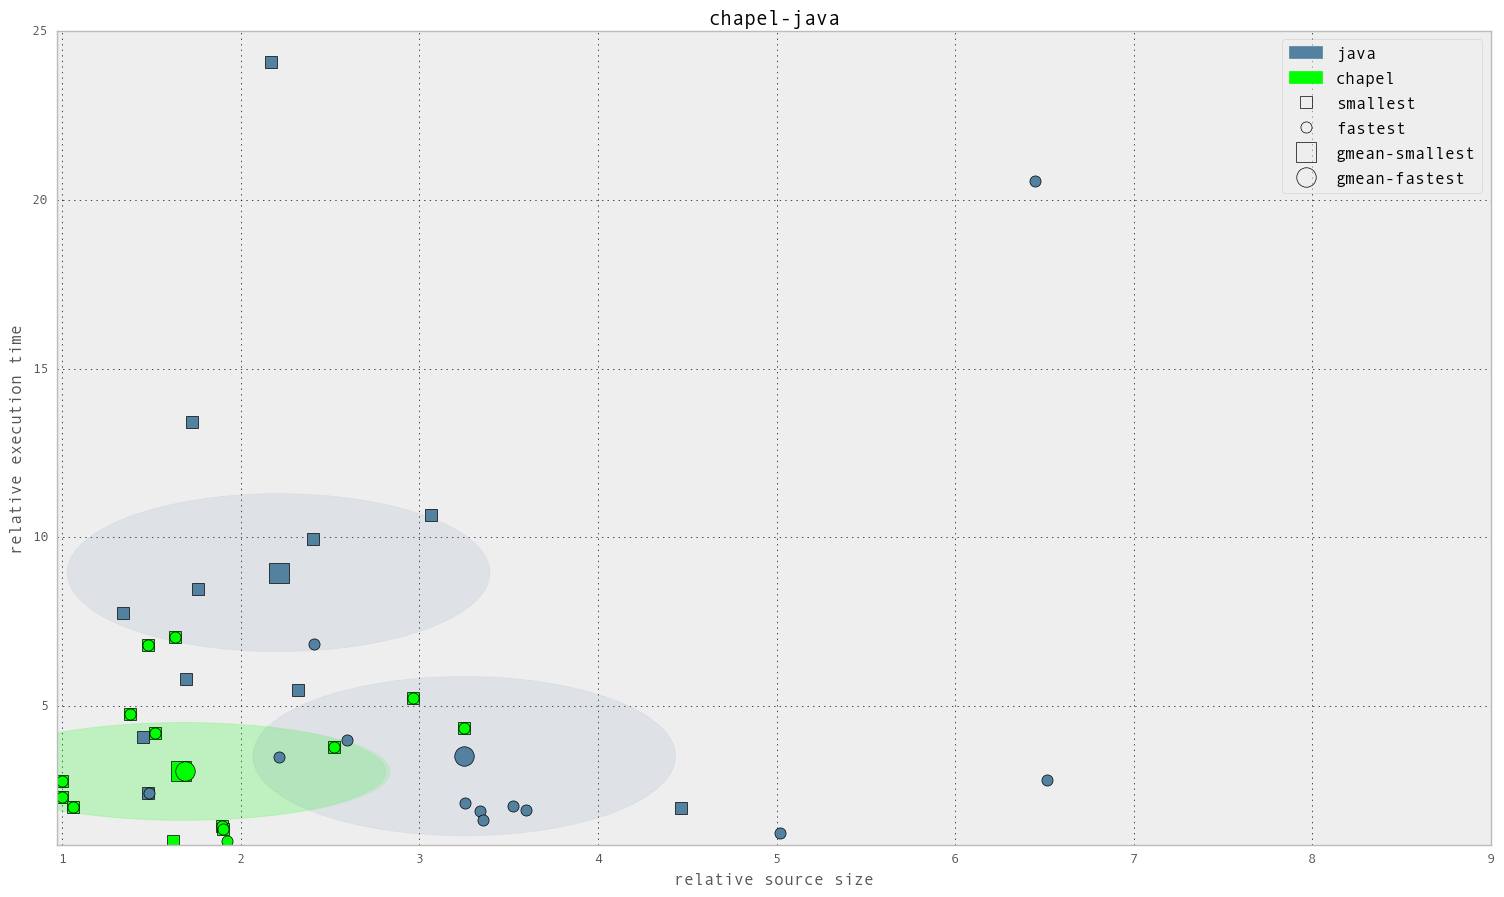

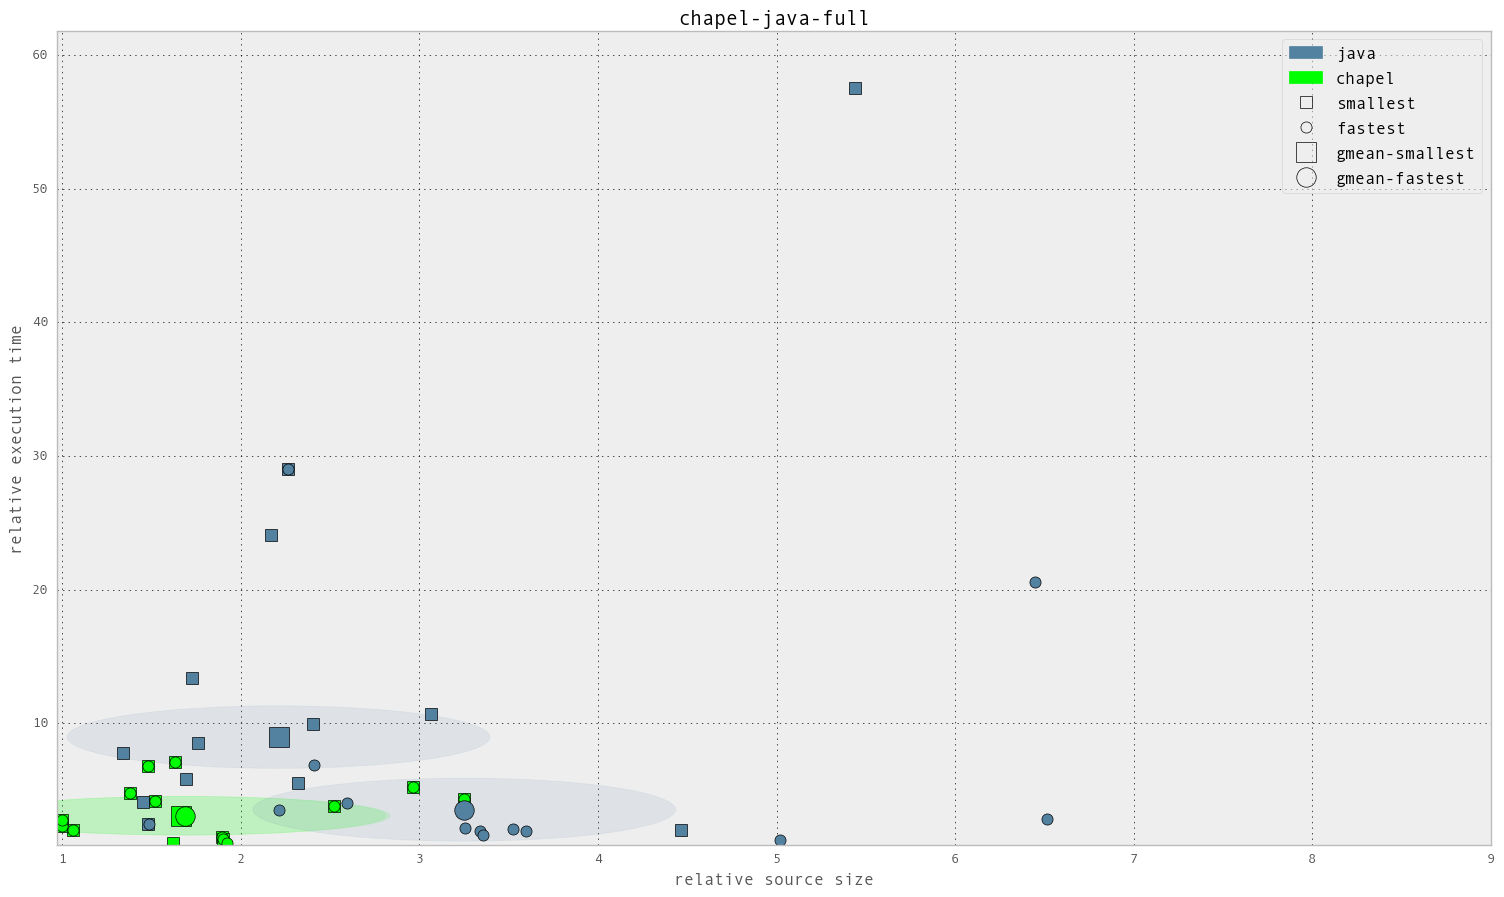

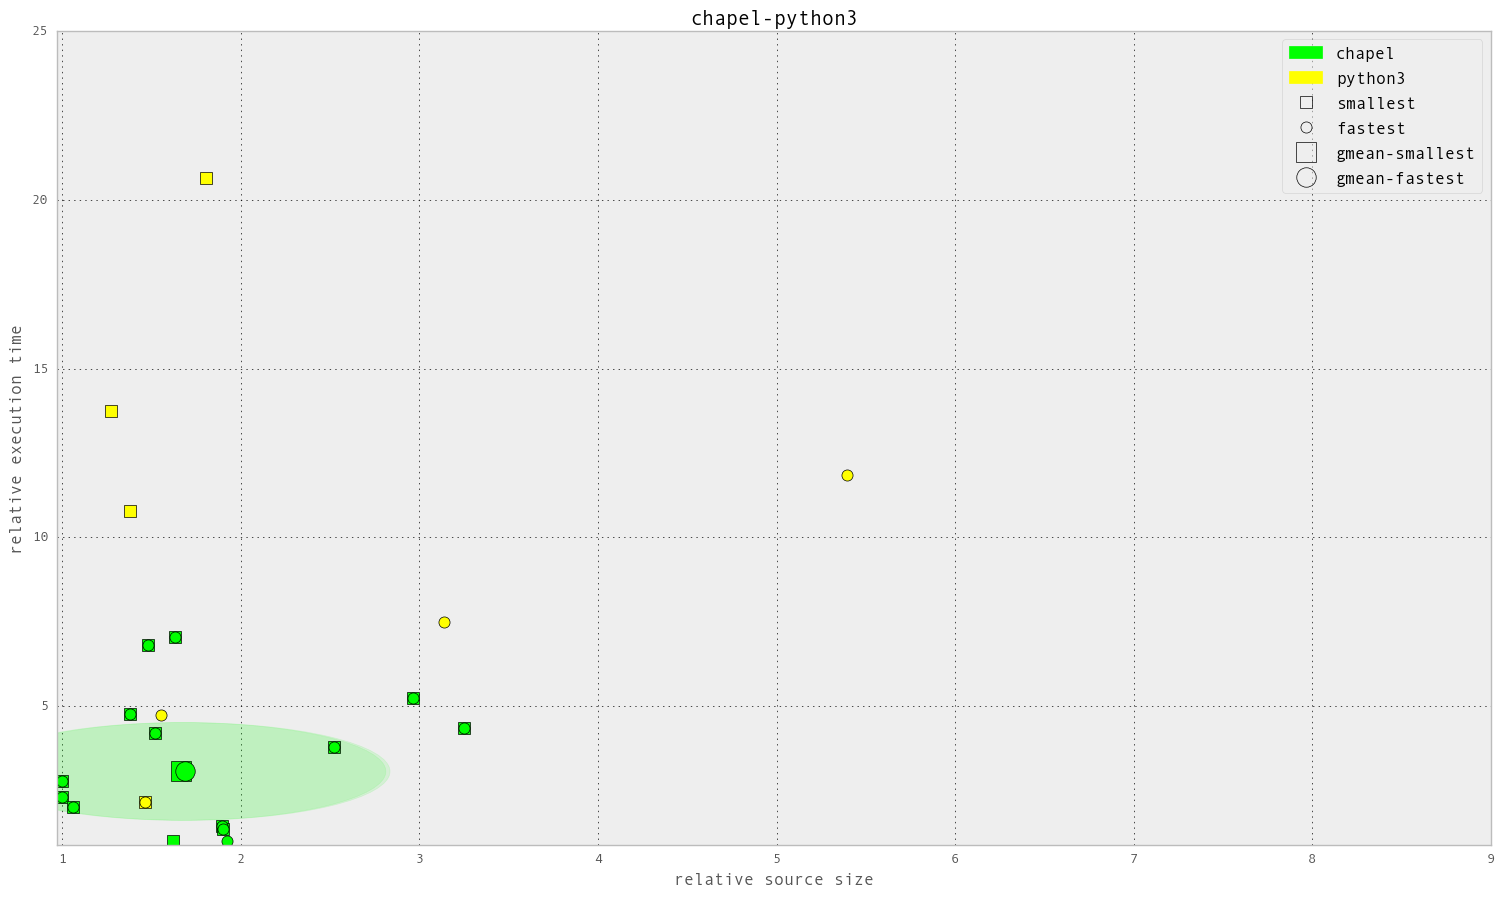

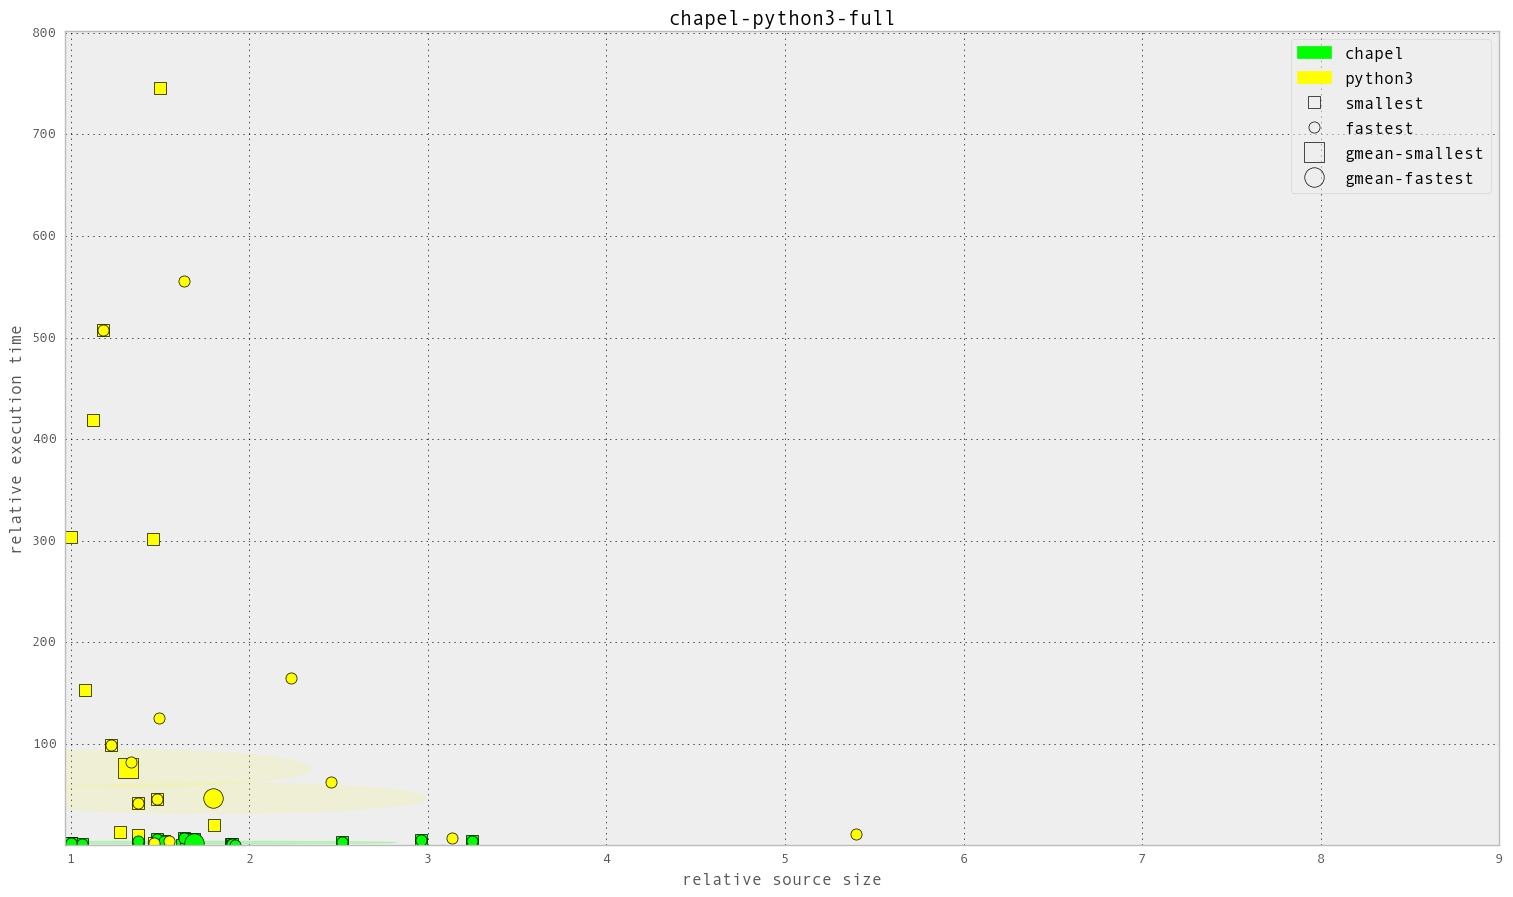

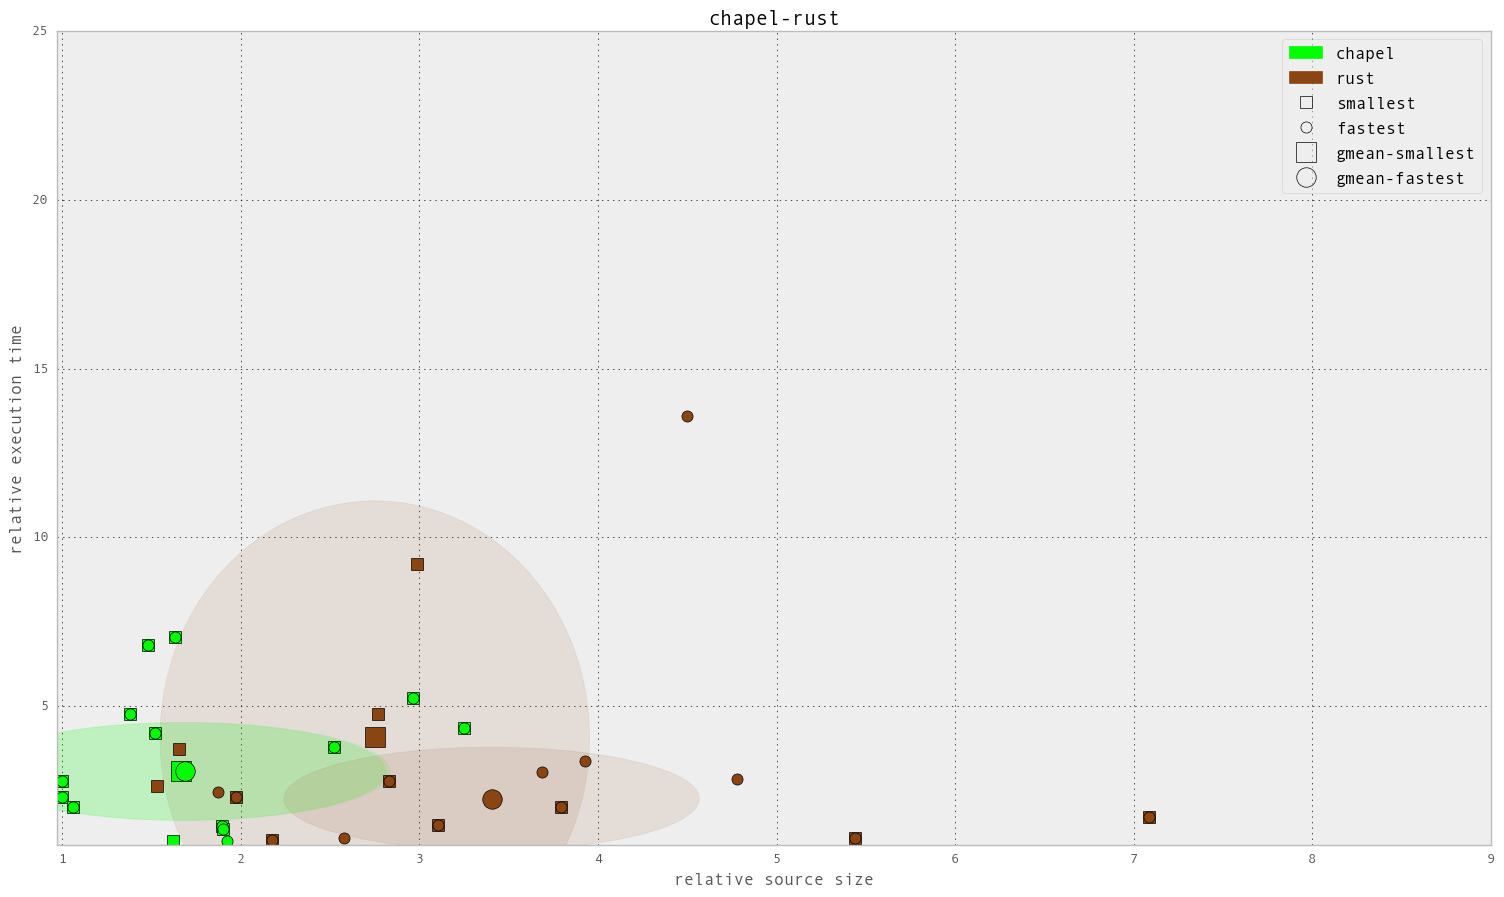

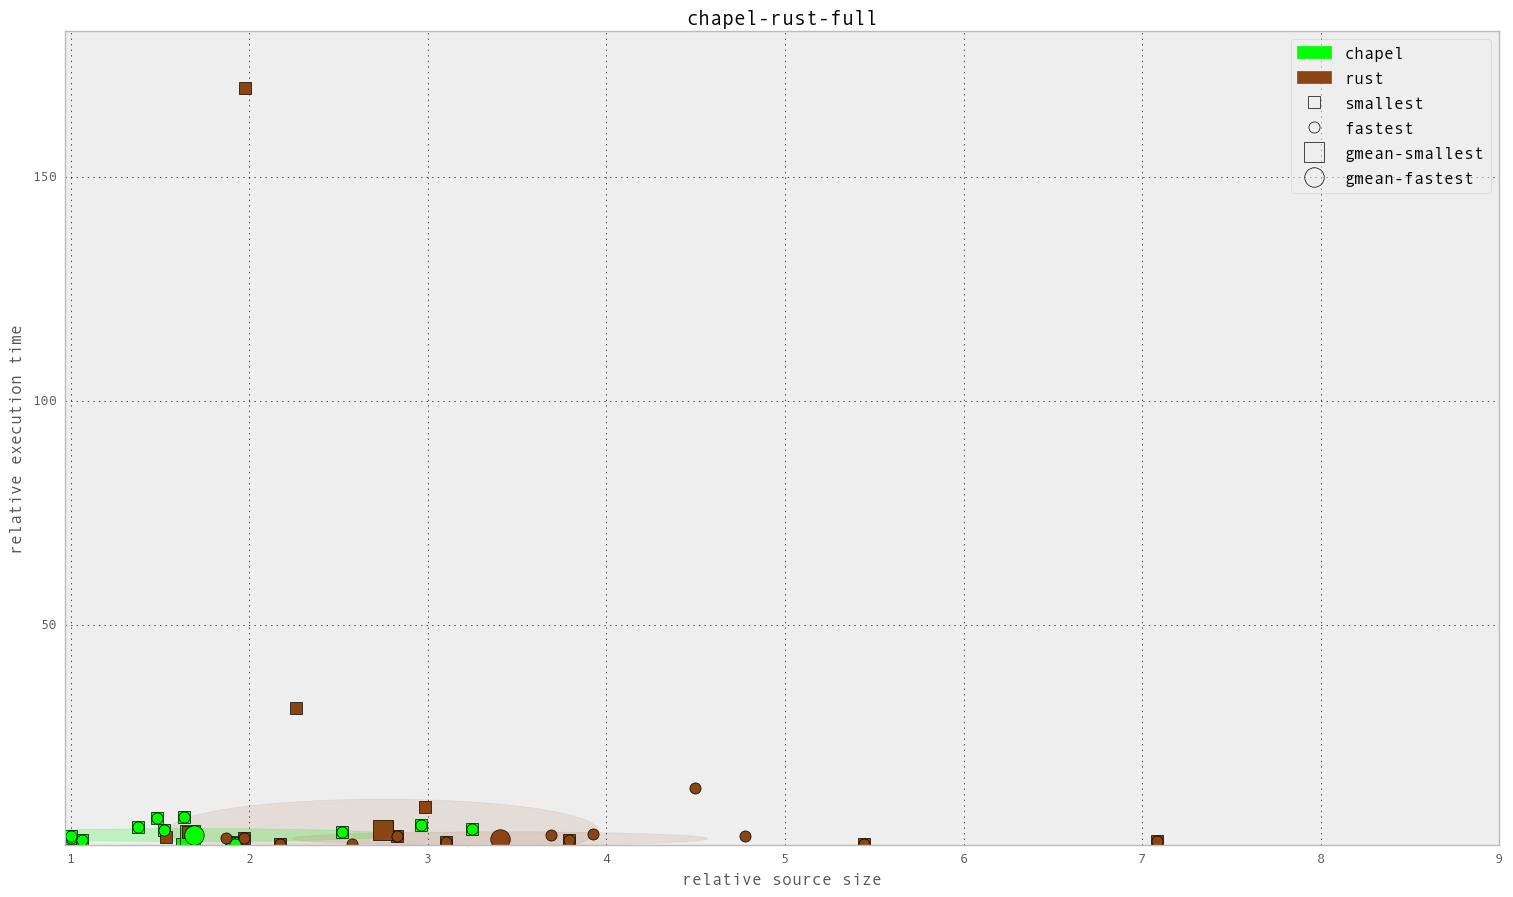

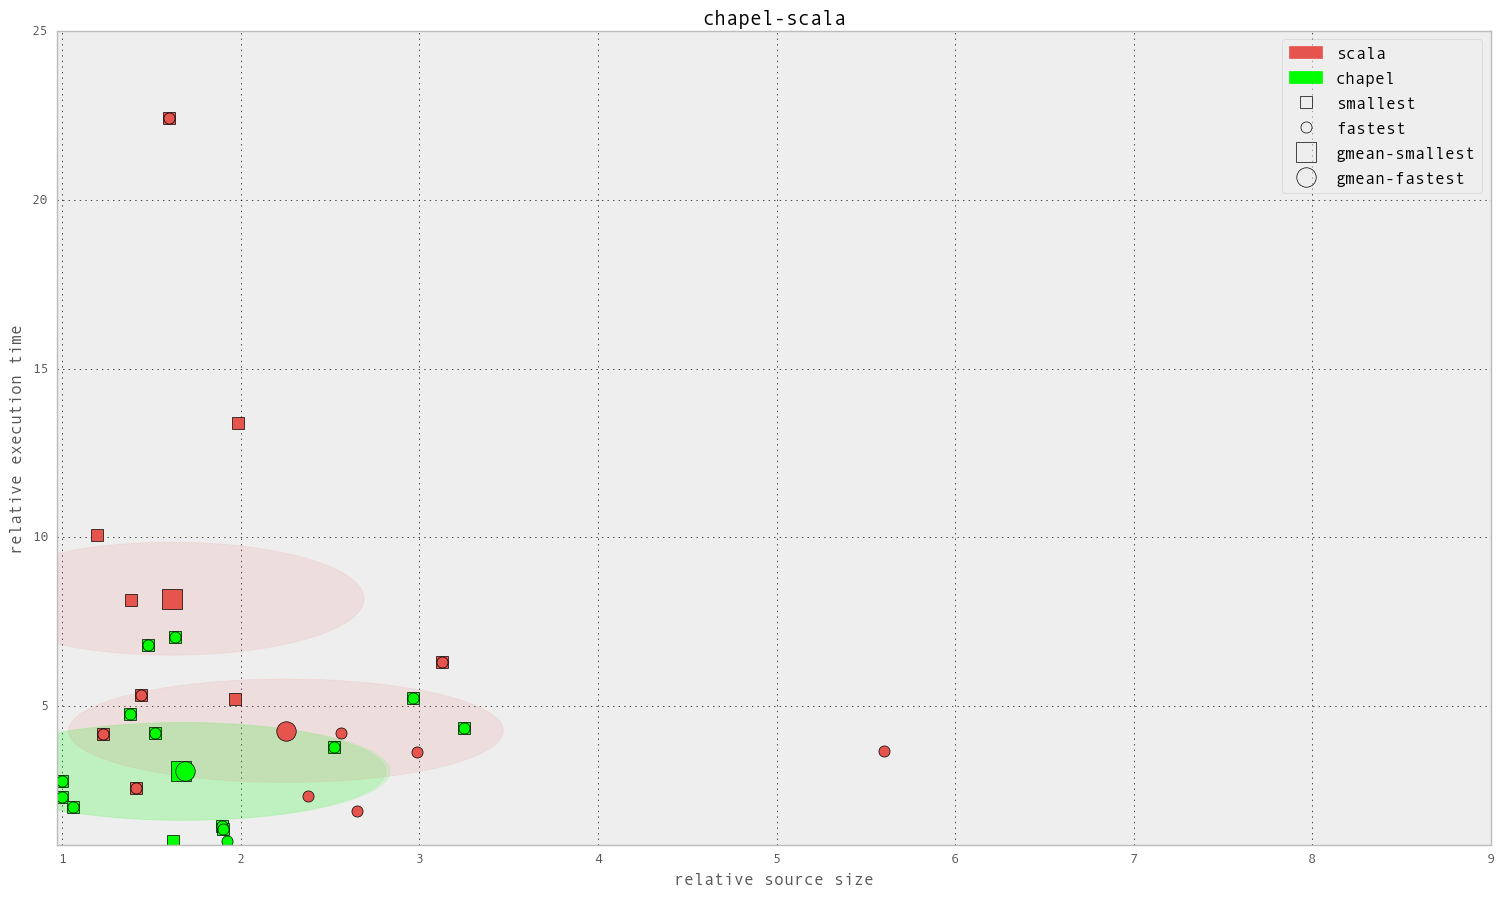

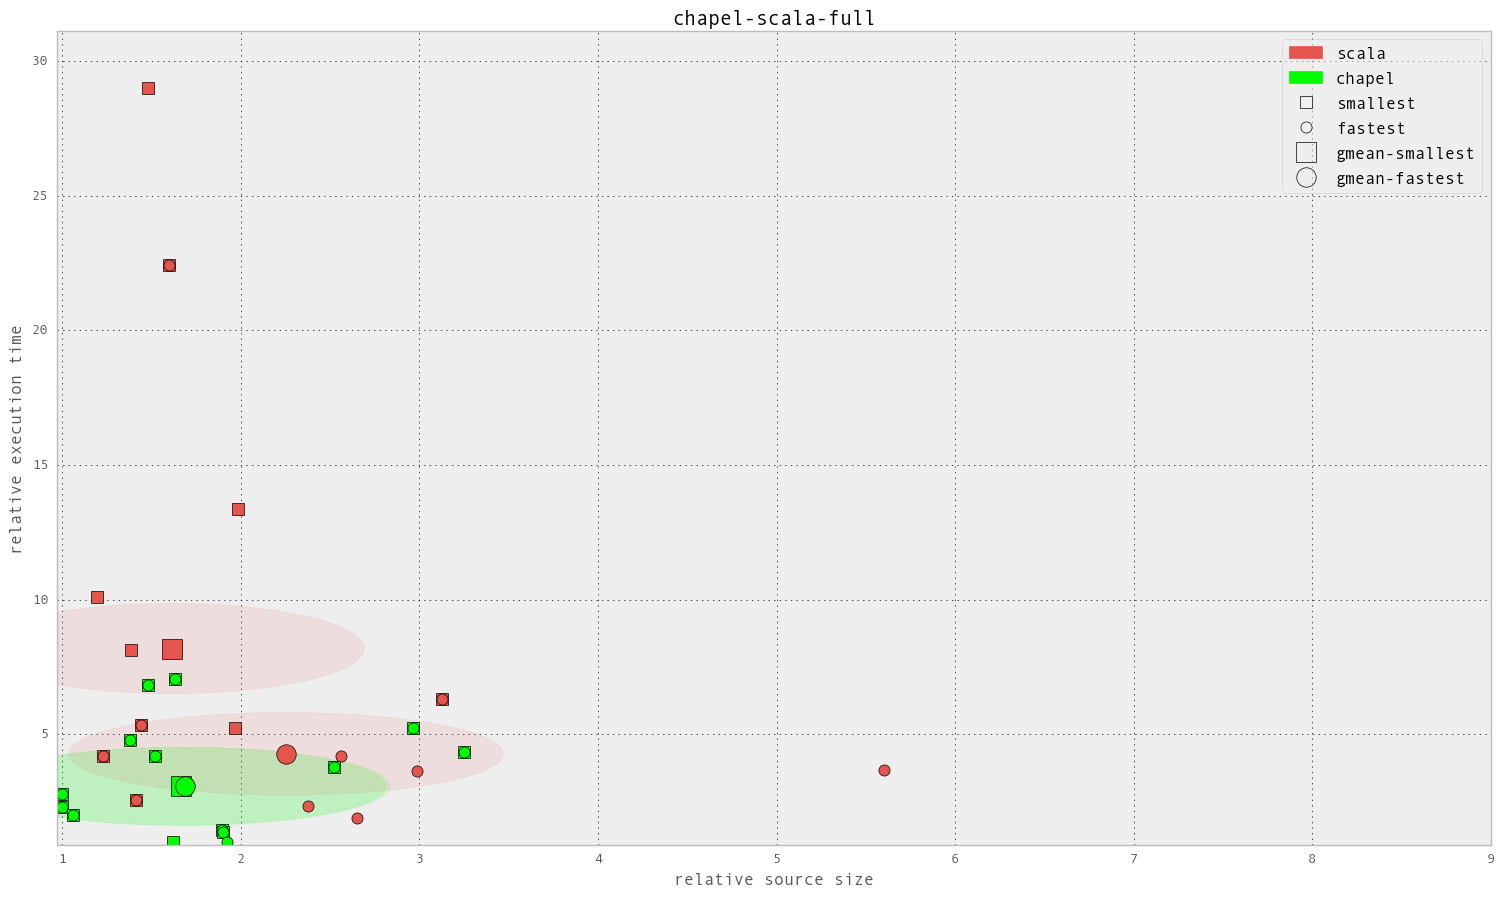

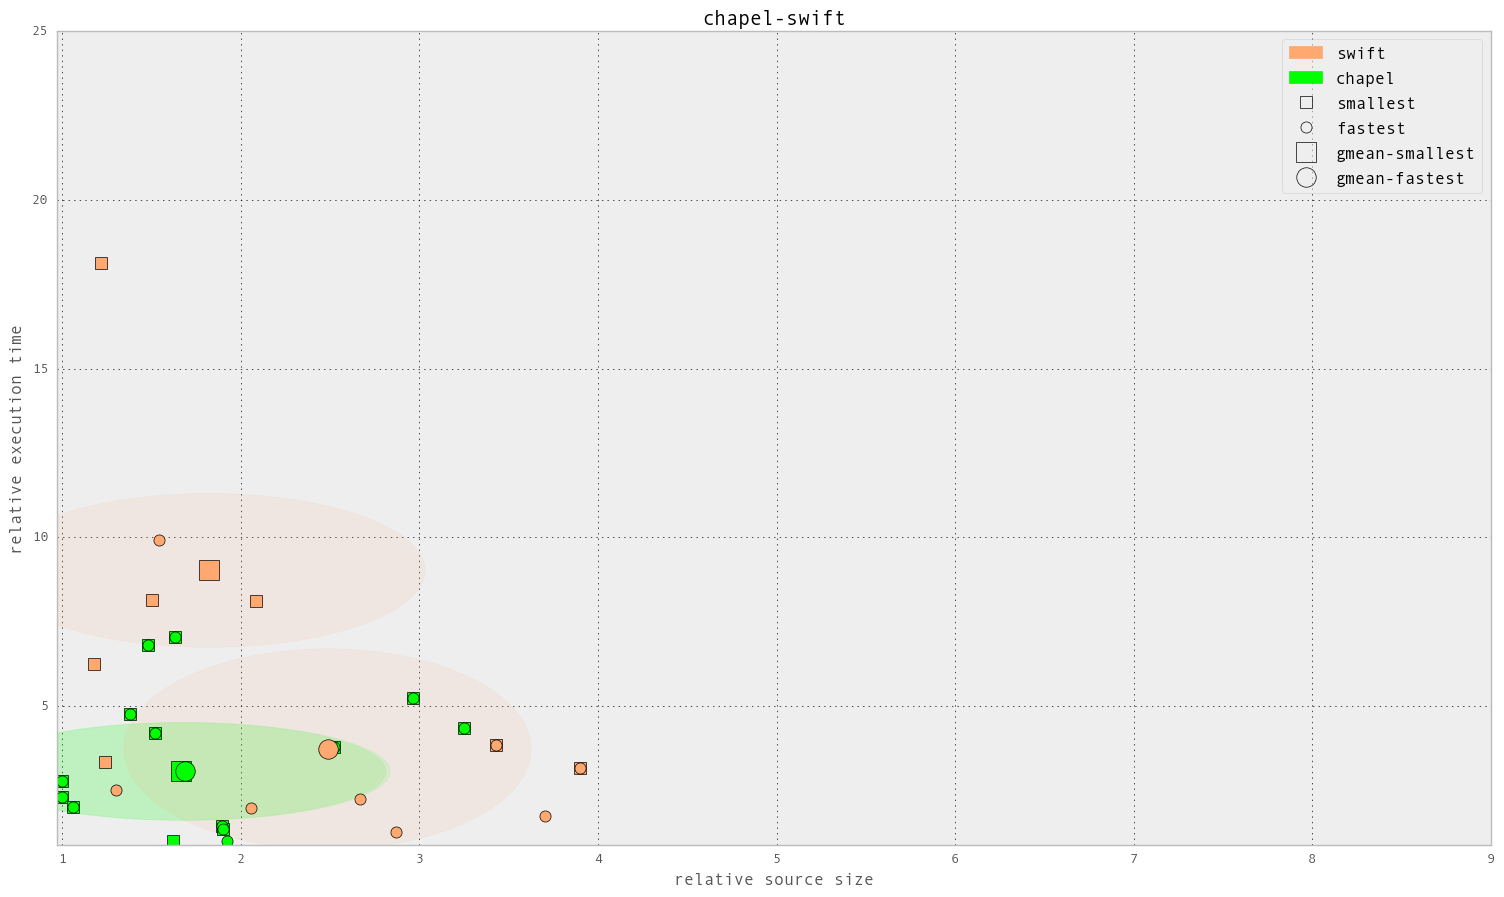

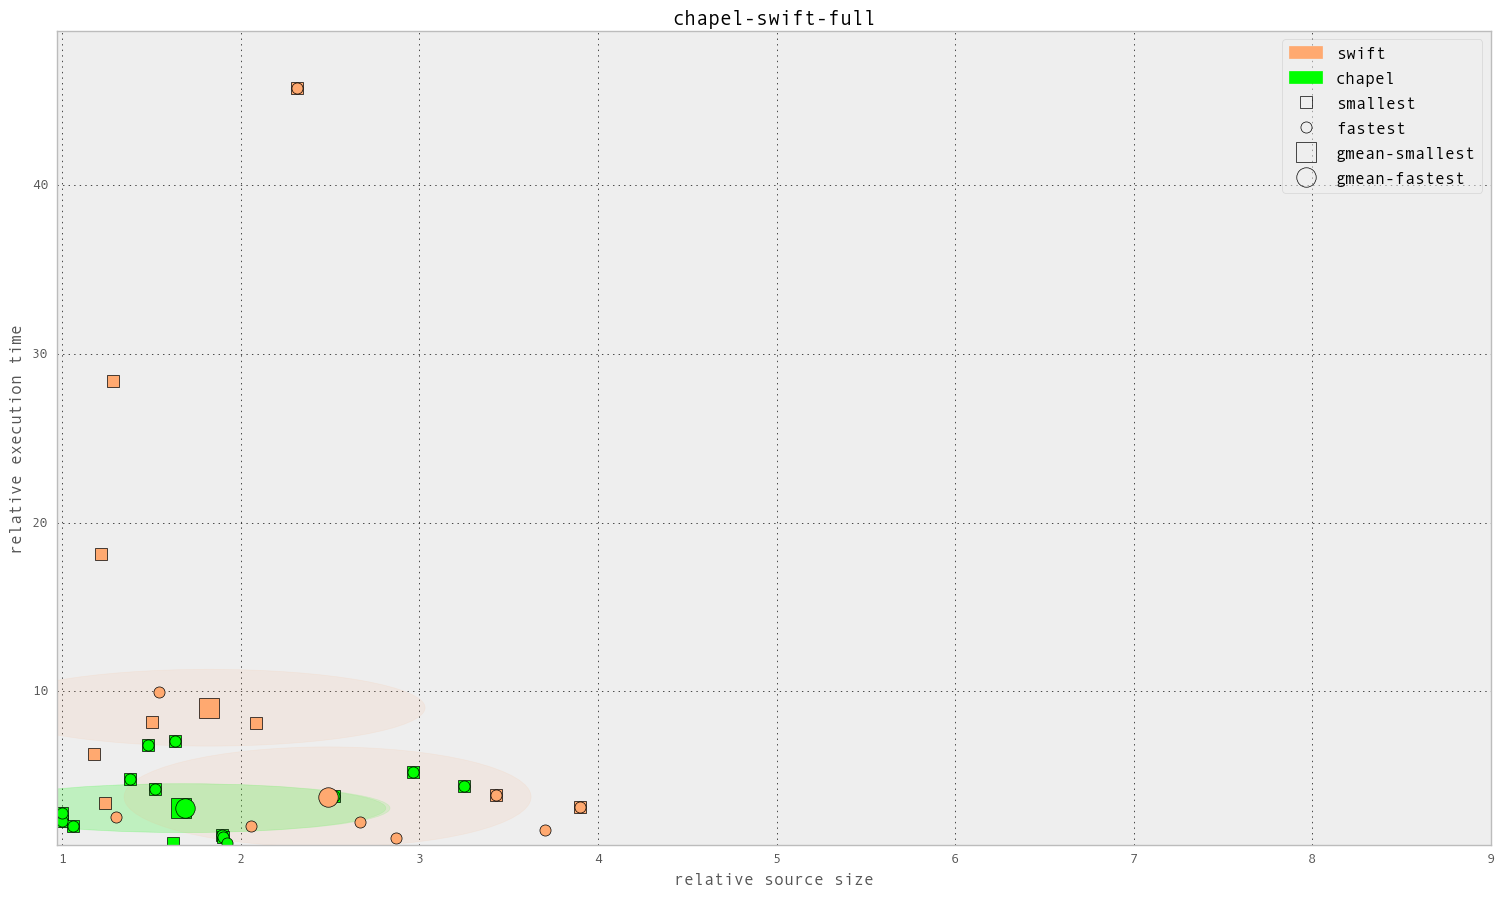

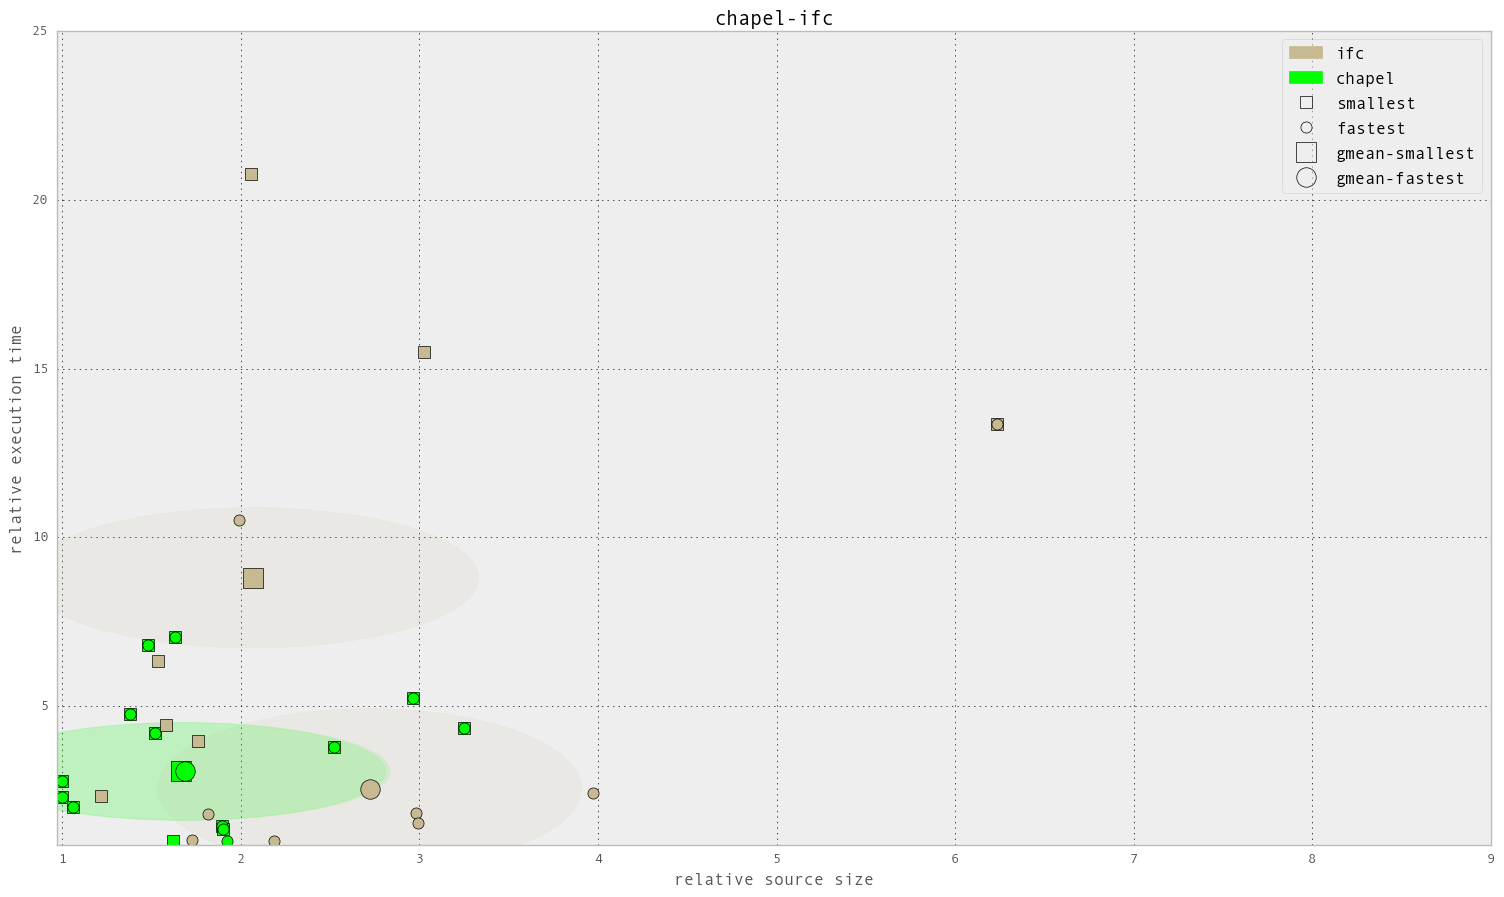

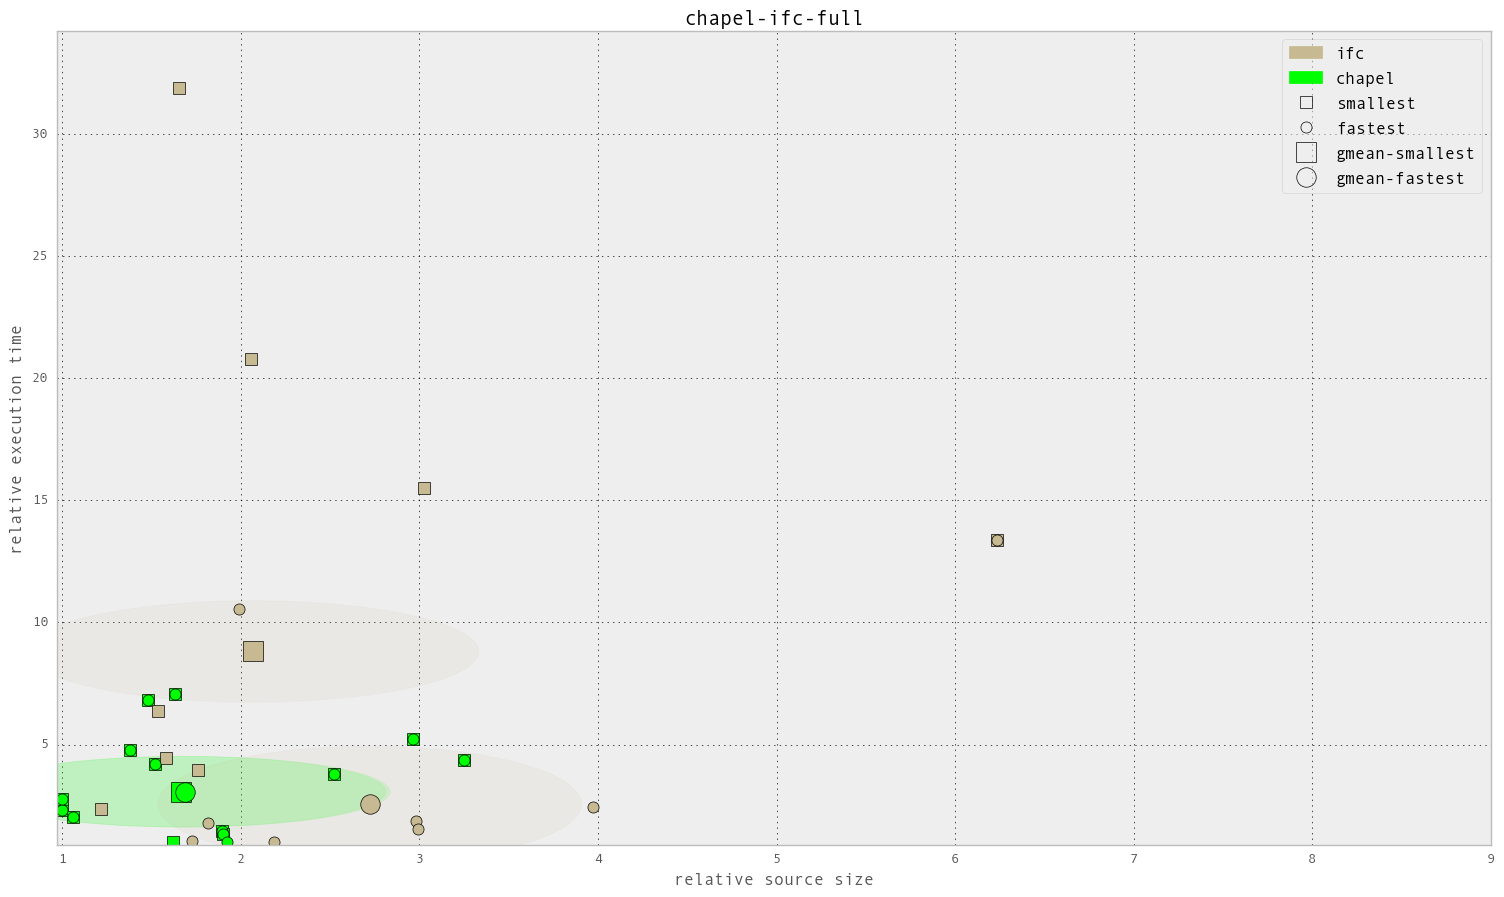

In [14]:
# Plot all language 1:1 comparisons
shootouts.language_all(configs)

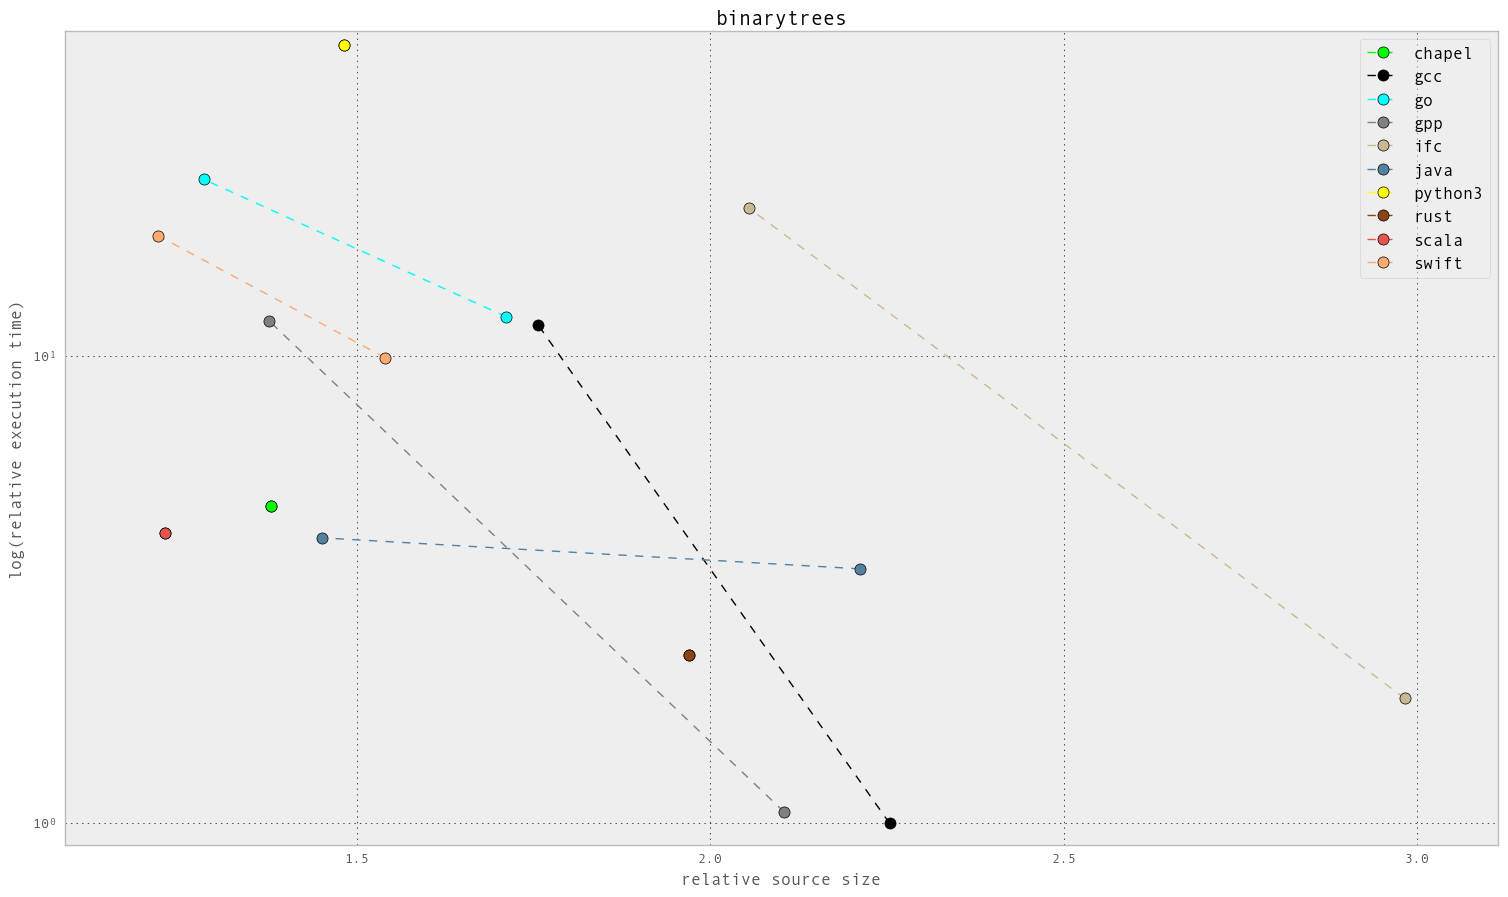

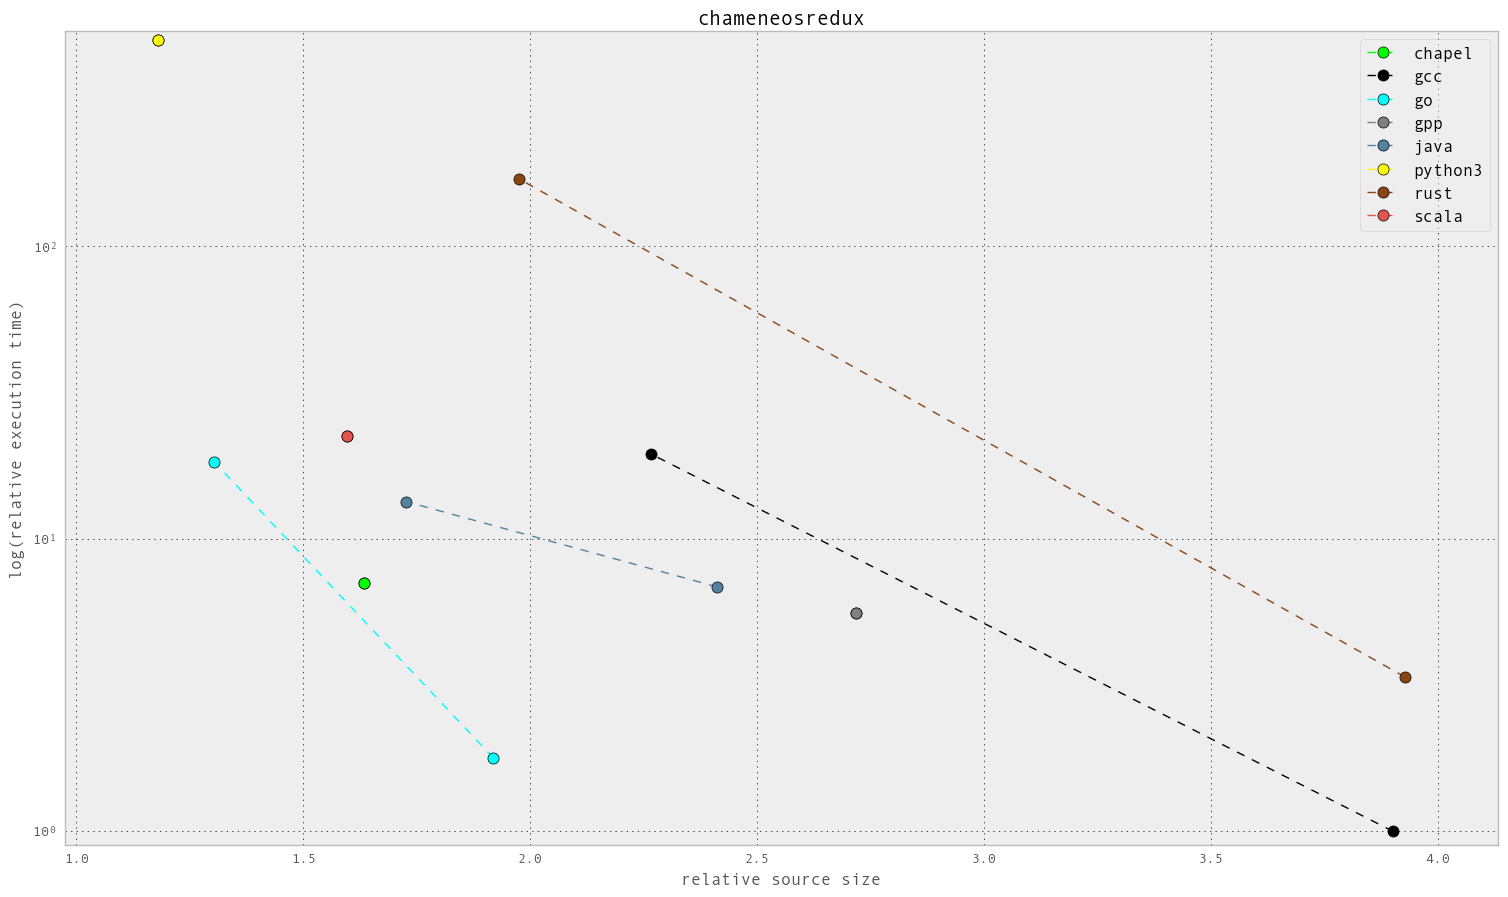

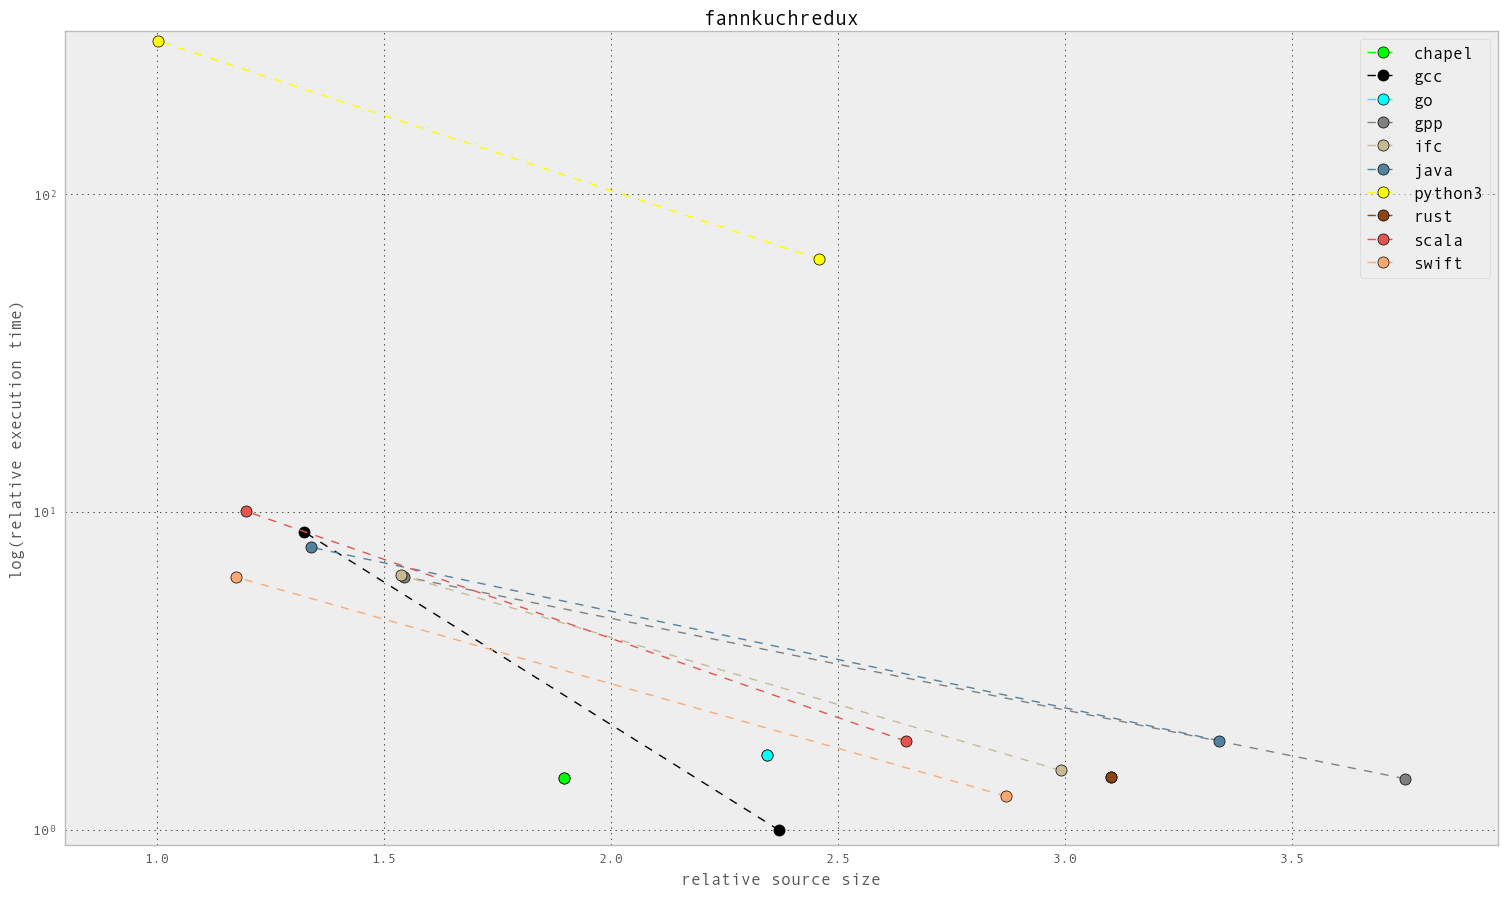

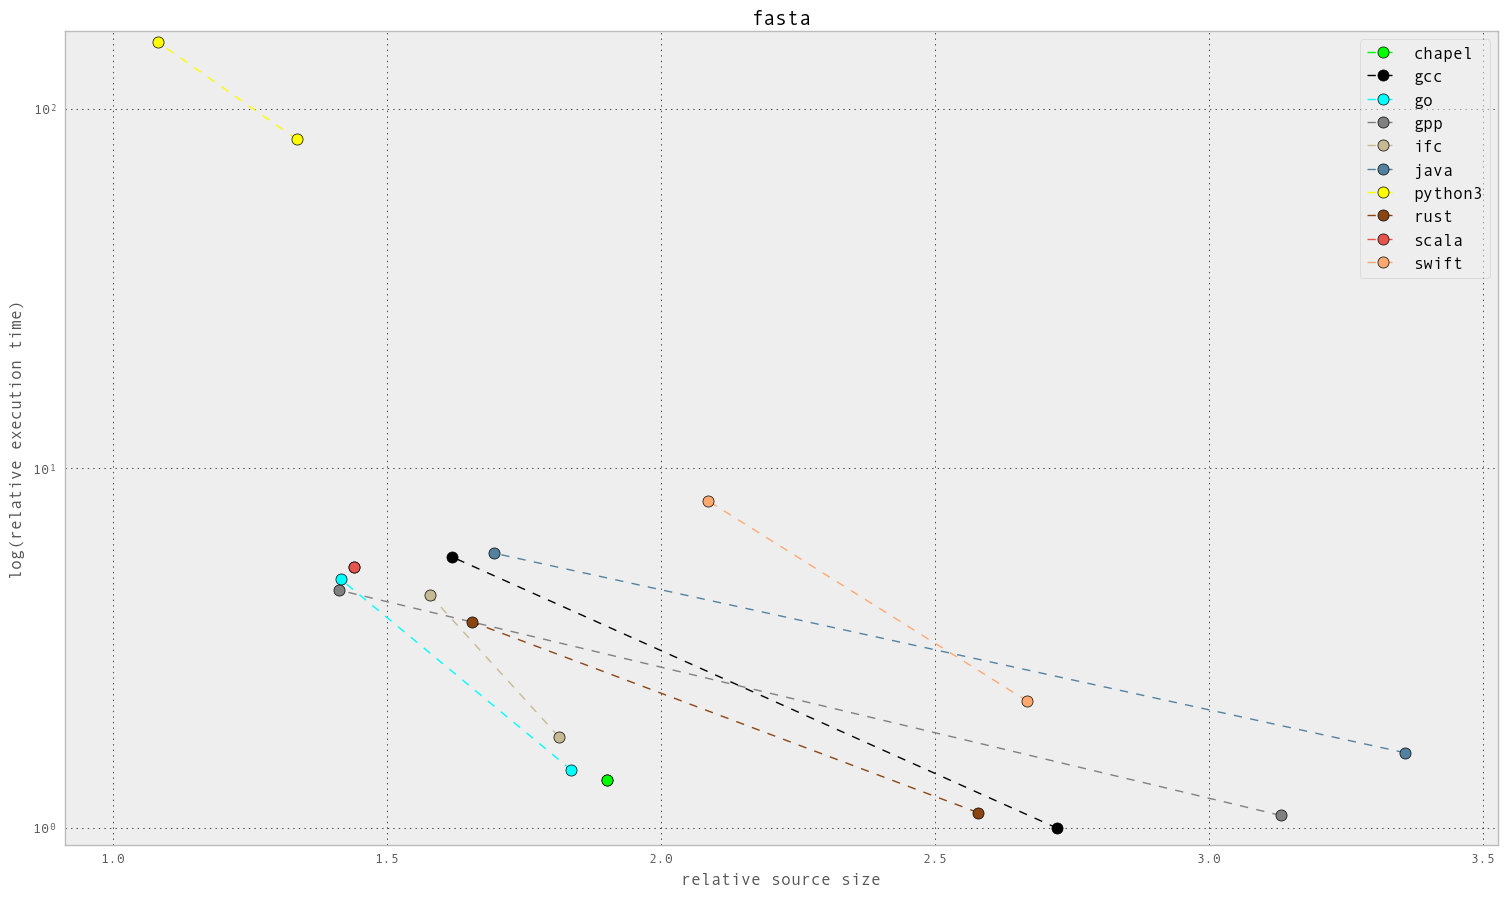

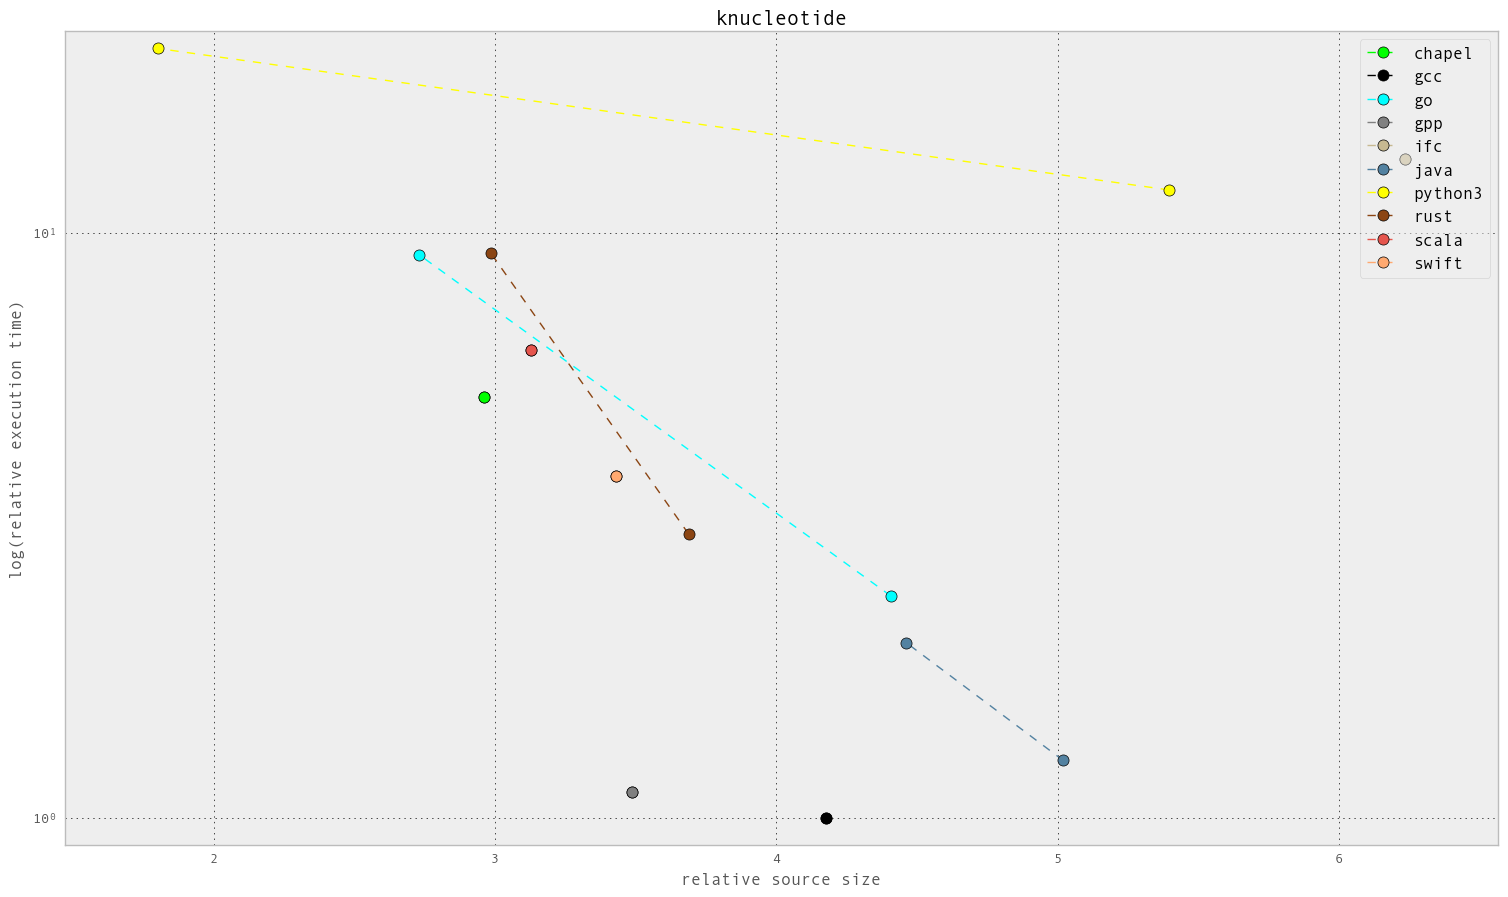

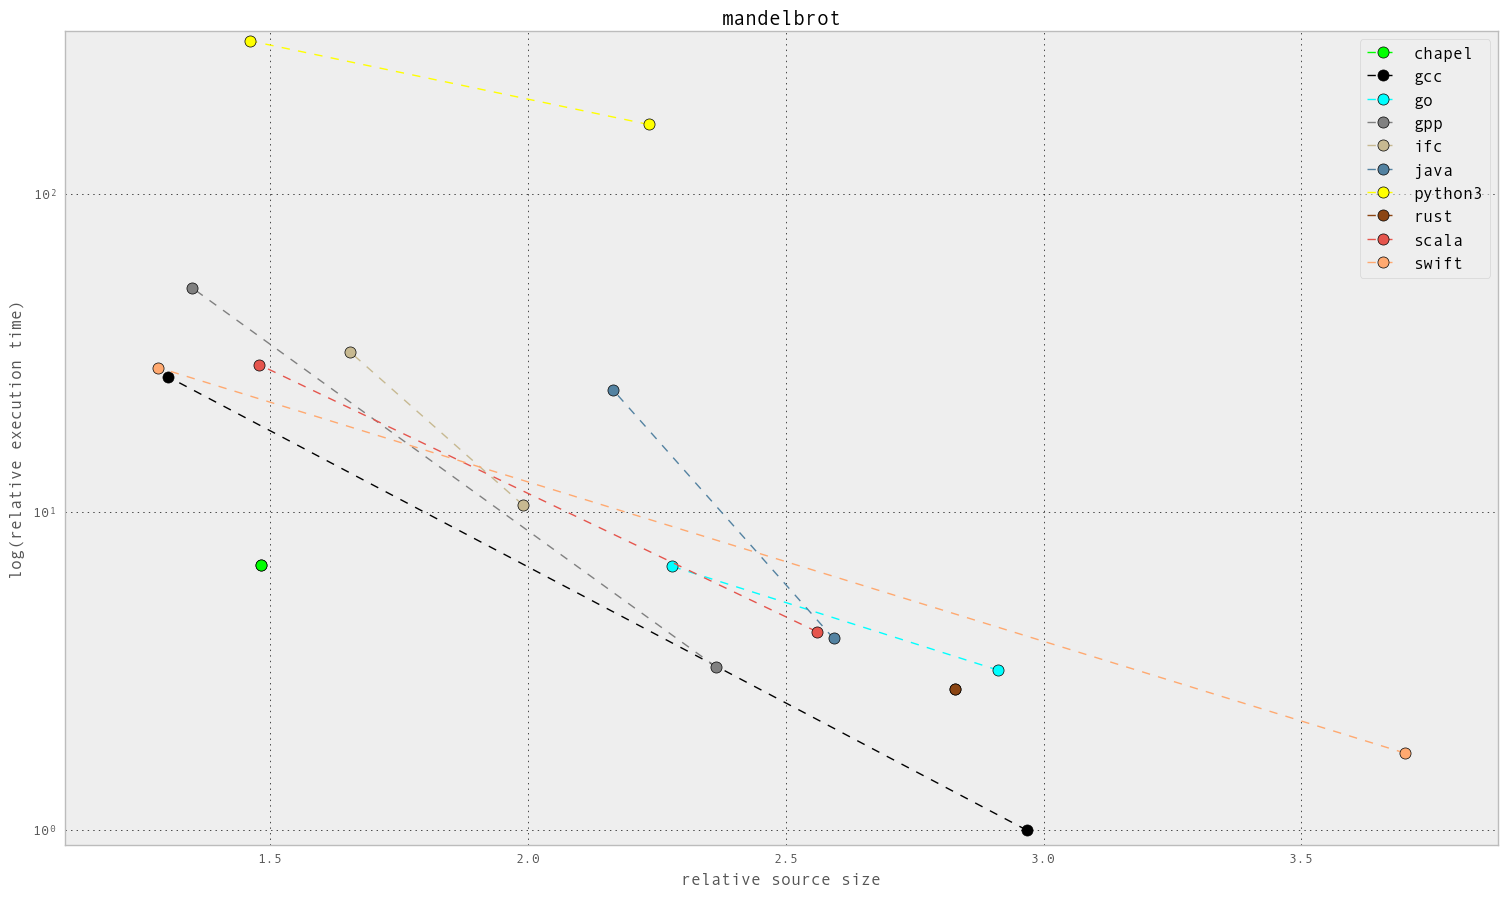

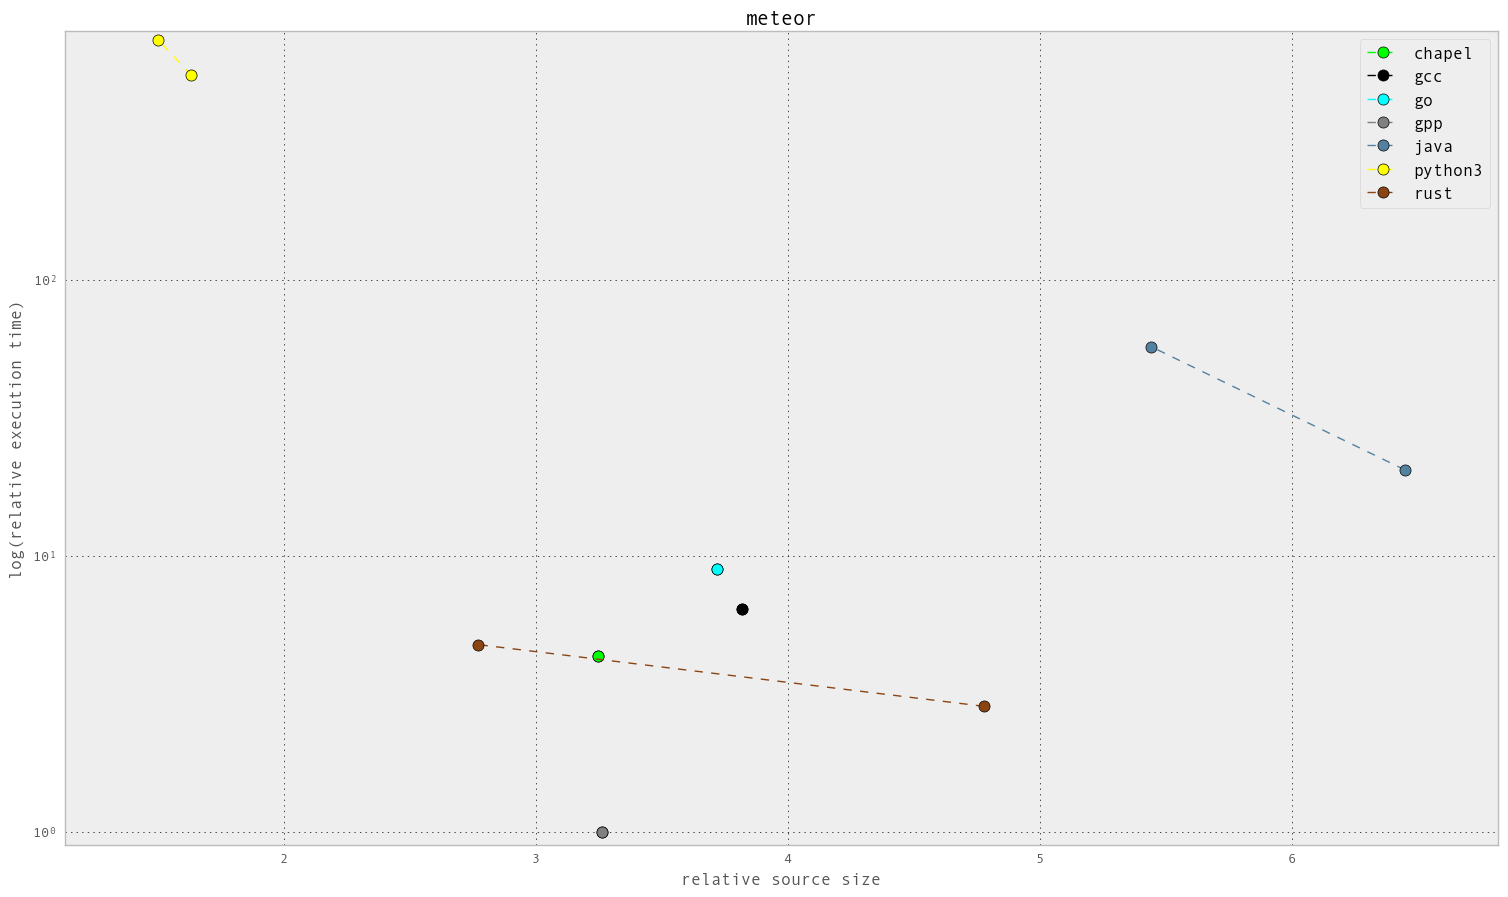

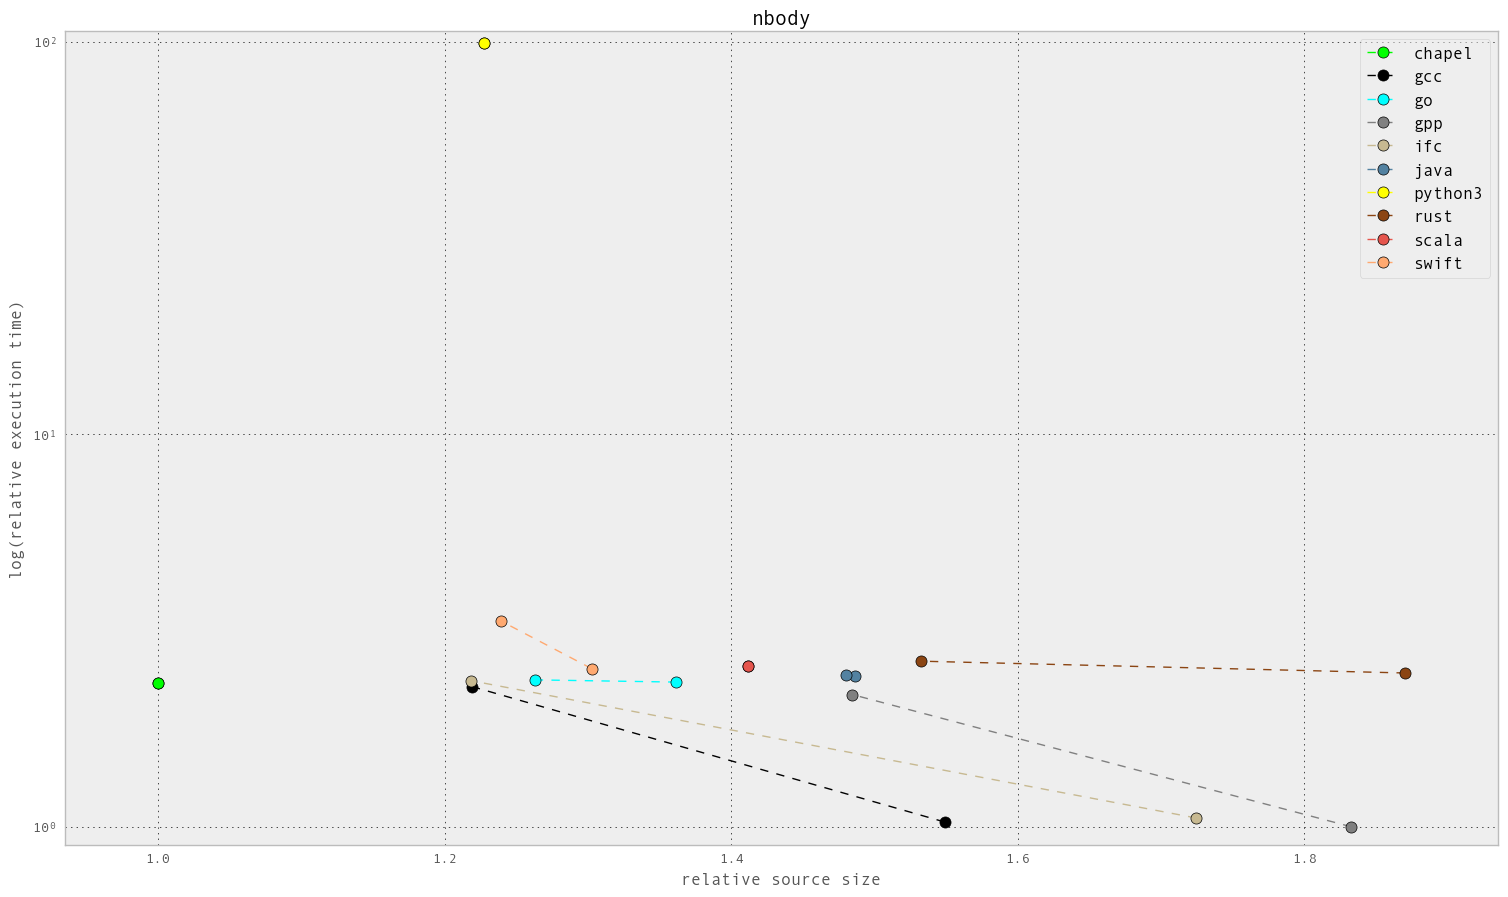

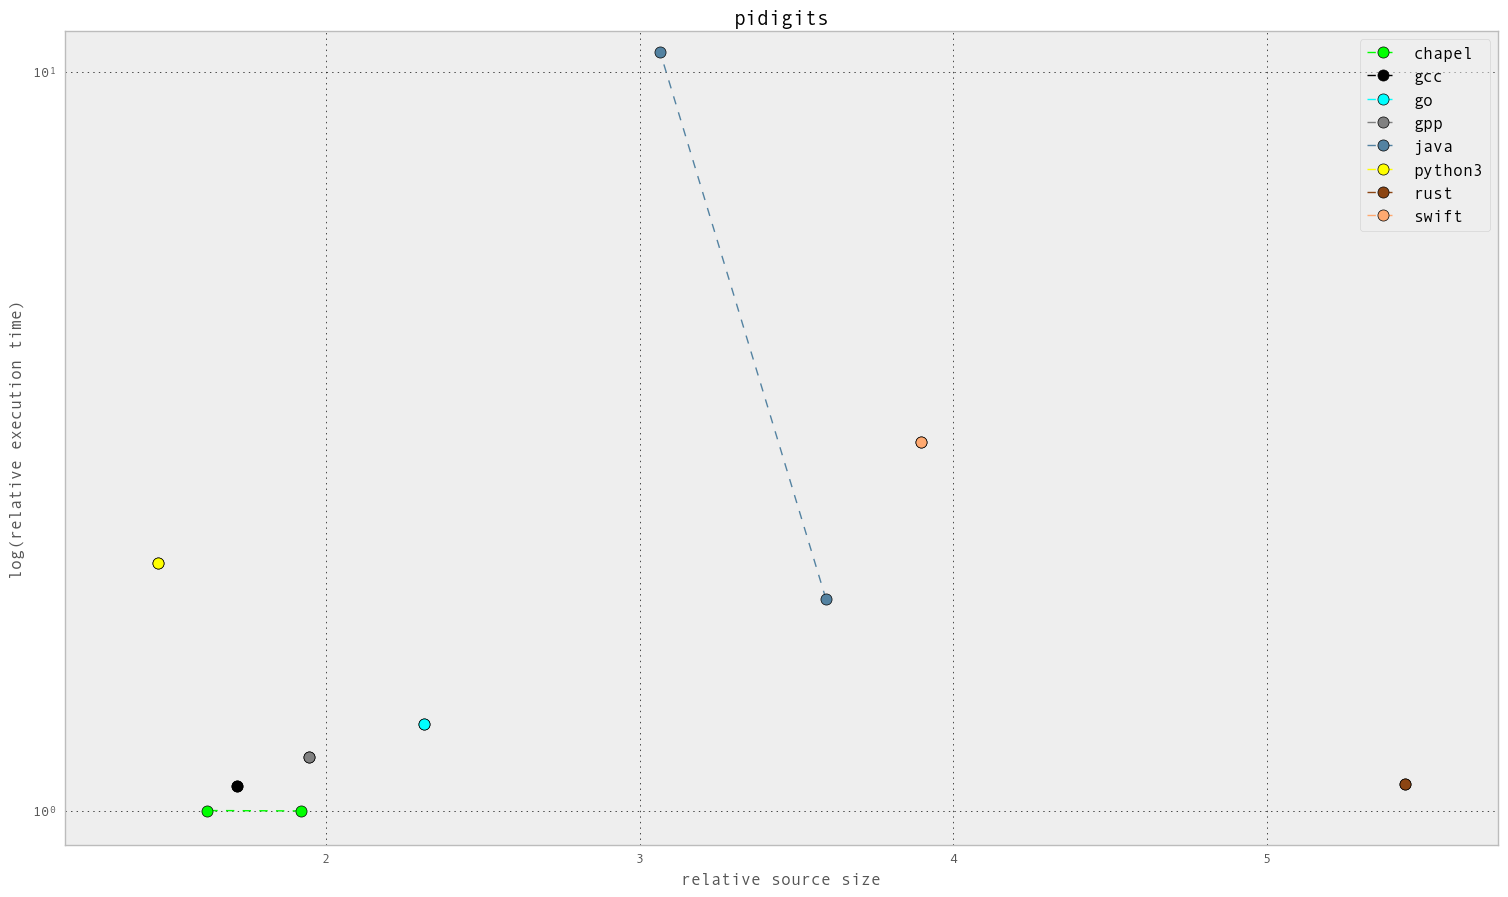

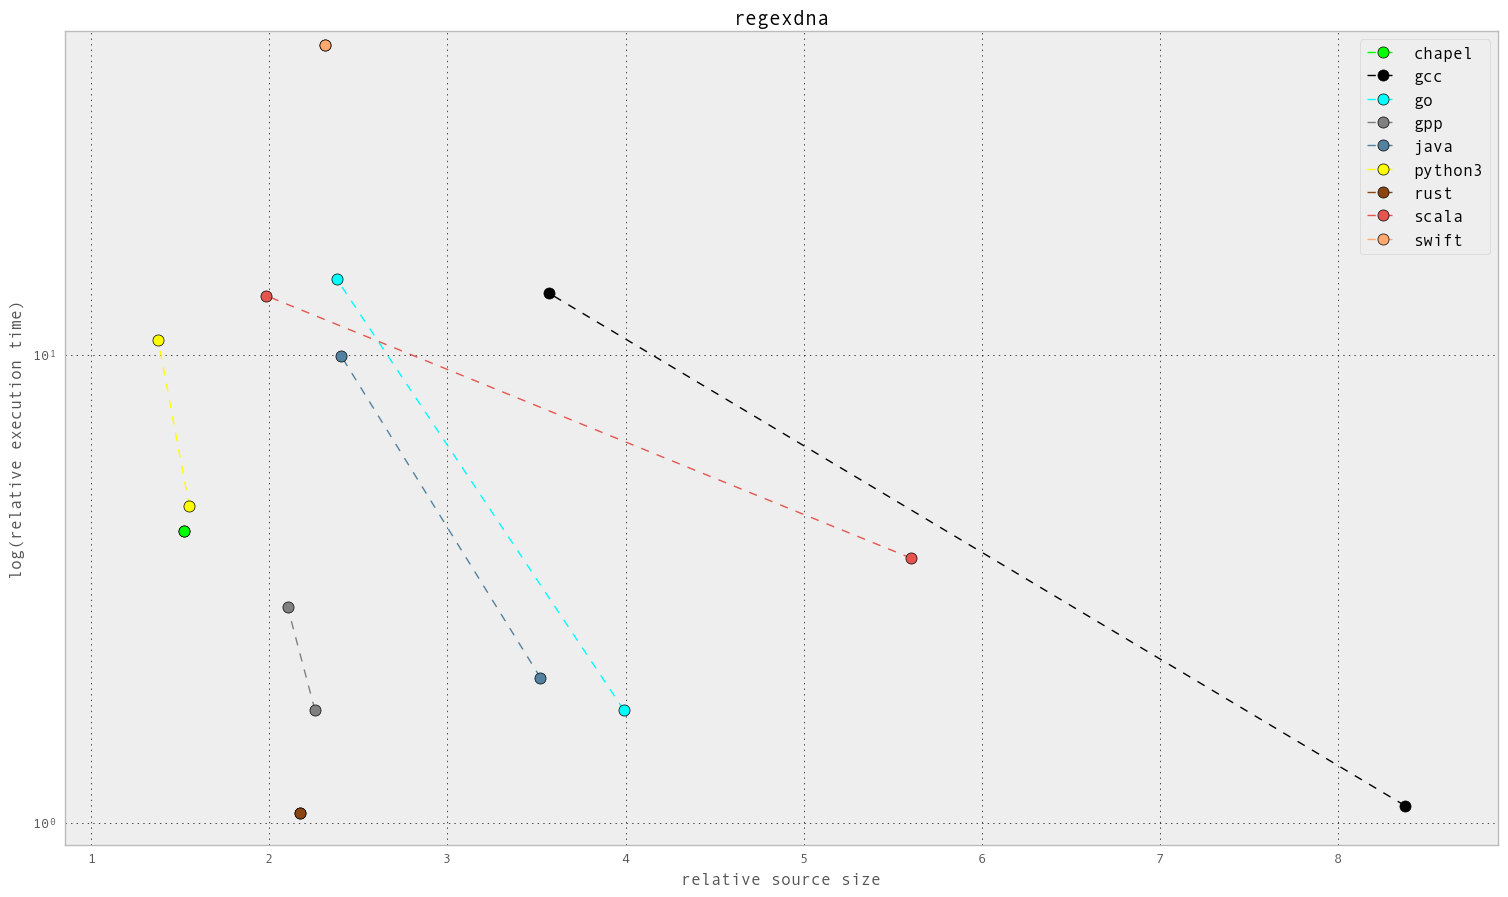

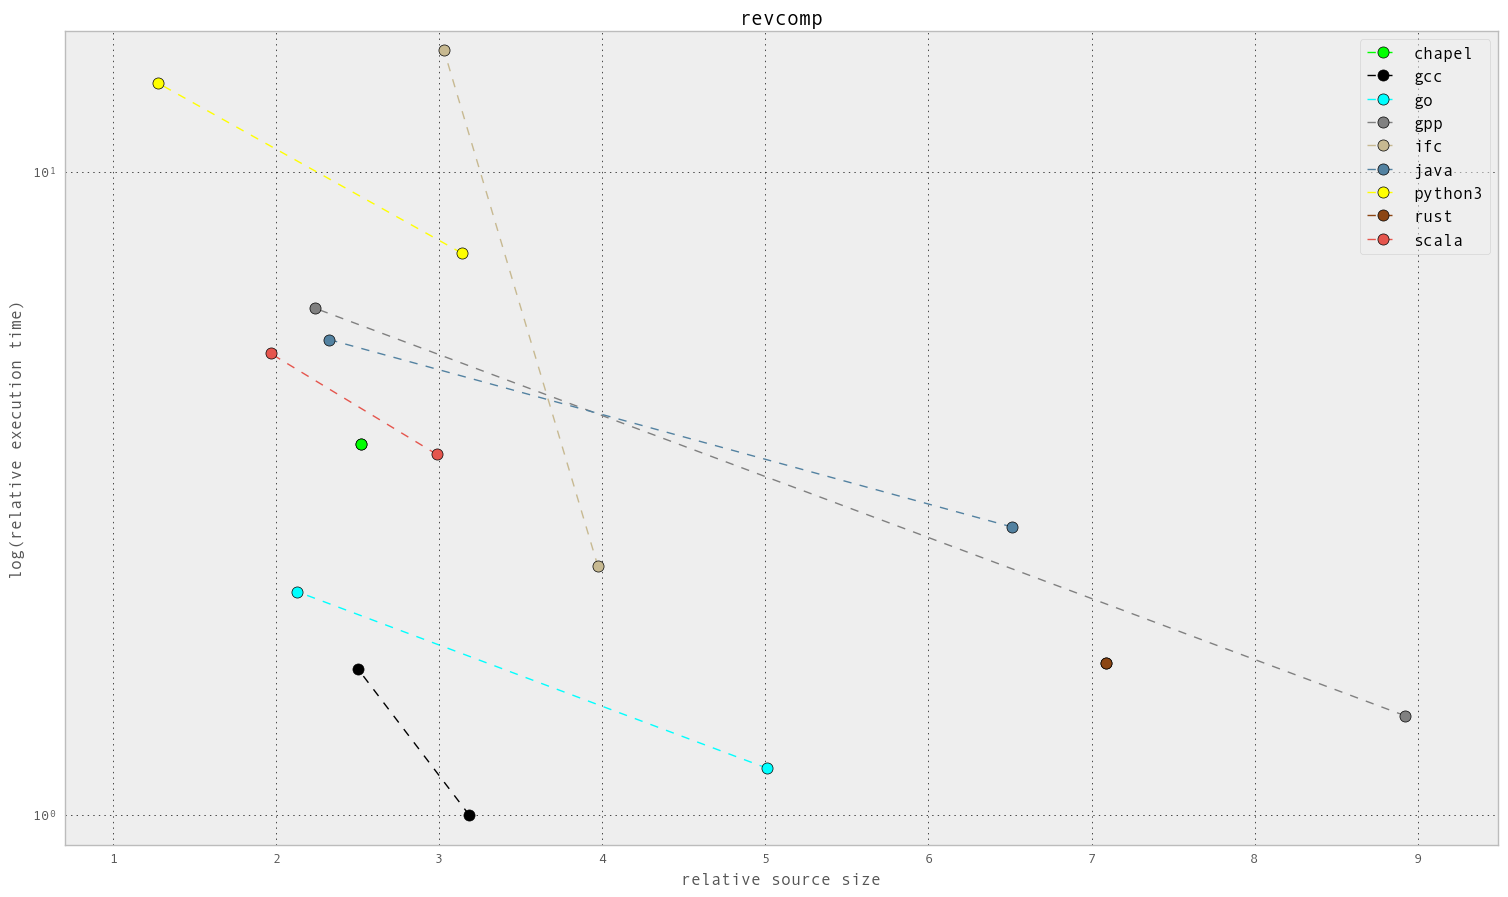

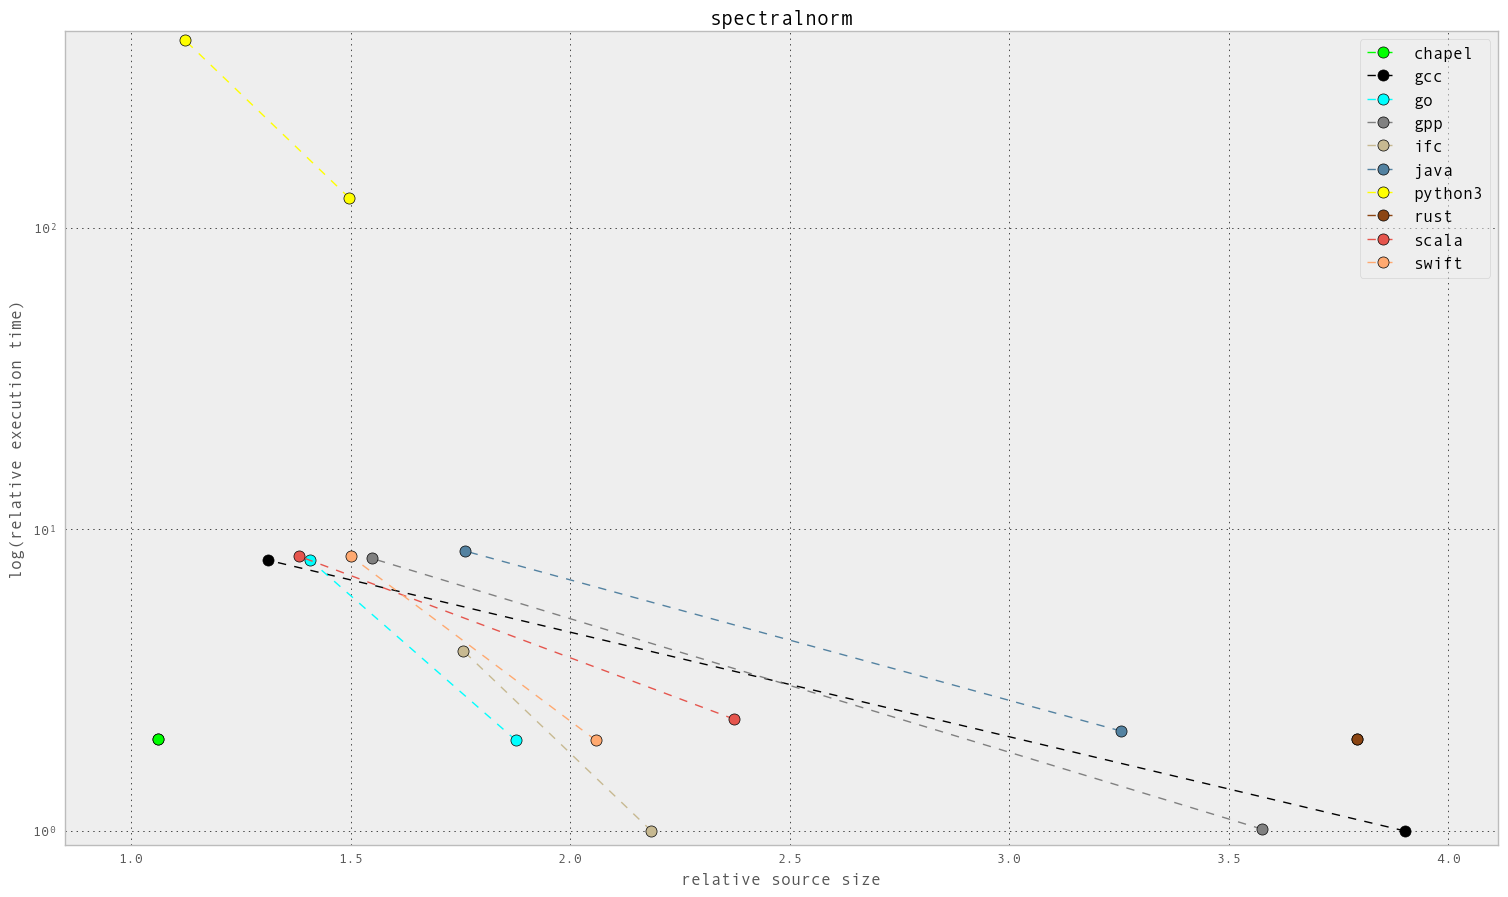

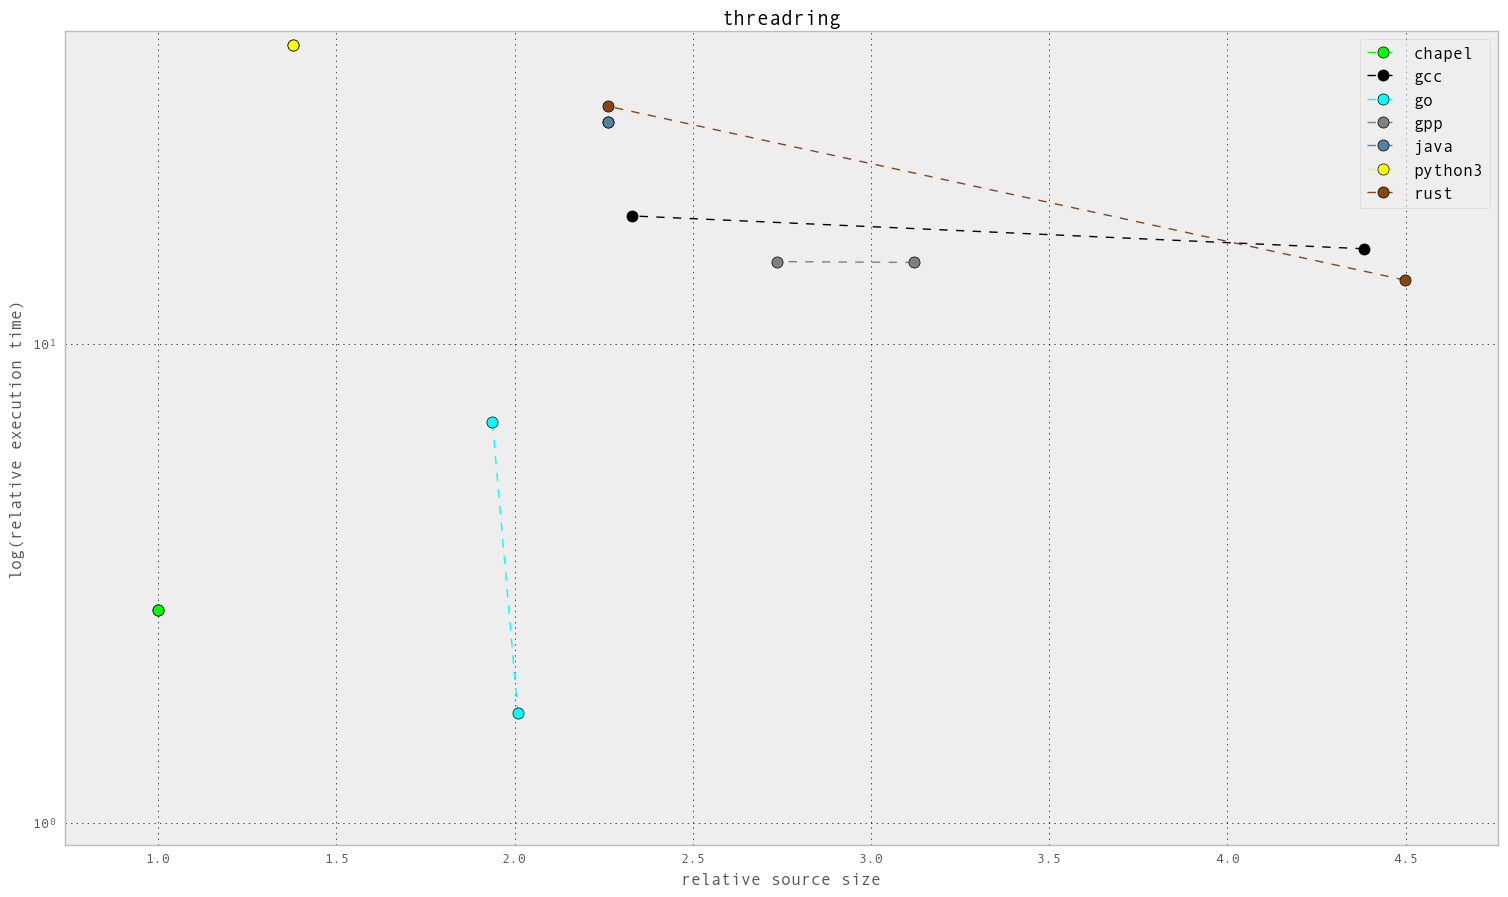

In [15]:
# Plot all shootout comparisons
shootouts.shootout_all(configs)